# Titanic passengers classification using Logistic Regression, Decision Tree, Random Forest and KNN in Python
# Adrian Żelazek

## Table of contents
Introduction
1. Libraries
2. Reading of dataset
3. Data clearing<br>
> 3.1 Imputation of missing data<br>
> 3.2 Removal of unnecessary features
4. Visualisation and grouping of data
5. Dummying
6. Machine Learning Models<br>
> 6.1 Data selection using Pearson correlation coefficient<br>
>> 6.2 **Logistic Regression - model 1**<br>
>> 6.2.1 Logistic Regression - model building<br>
>> 6.2.2 Logistic Regression - model evaluation<br>
>> 6.2.3 Prediction based on test dataset<br>
>> 6.2.4 Export of model prediction to excel<br>
>>> 6.3 **Decision Tree - model 2**<br>
>>> 6.3.1 Decision Tree - model building<br>
>>> 6.3.2 Decision tree - visualization<br>
>>> 6.3.3 Decision Tree - model evaluation<br>
>>> 6.3.4 Prediction based on test dataset<br>
>>> 6.3.5 Export of model prediction to excel<br>
>>> 6.3.6 **Decision tree - tuning of hyperparameters (Grid Search) - model 3**<br>
>>> 6.3.7 Decision tree - visualization after tuning of hyperparameters<br>
>>> 6.3.8 Decision Tree - model evaluation AFTER tuning of hyperparameters<br>
>>> 6.3.9 Comparision of Decision Tree models before and after tuning of hyperparameters<br>
>>> 6.3.10 Prediction based on test dataset<br>
>>> 6.3.11 Export model prediction to excel<br>
>>>> 6.4 **Random Forest - model 4** <br>
>>>> 6.4.1 Random Forest - model building<br>
>>>> 6.4.2 Random Forest - model evaluation<br>
>>>> 6.4.3 Prediction based on test dataset<br>
>>>> 6.4.4 Export model prediction to excel<br>
>>>> 6.4.5 **Random Forest - tuning of hyperparameters - model 5**<br>
>>>> 6.4.6 Random Forest - model evaluation after tuning of hyperparameters<br>
>>>> 6.4.7 Comparision of Random Forest models before and after tuning of hyperparameters<br>
>>>> 6.4.8 Prediction based on test dataset<br>
>>>> 6.4.9 Export model prediction to excel<br>
>>>>> 6.5 **K Nearest Neighbor (KNN) - model 6**<br>
>>>>> 6.5.1 KNN - model building<br>
>>>>> 6.5.2 KNN - model evaluation<br>
>>>>> 6.5.3 Prediction based on test dataset<br>
>>>>> 6.5.4 Export model prediction to excel<br>
7. Comparison of constructed models
8. Conclusions

## Introduction
<b>Dataset description:</b><br>
The data set concerns the characteristics of the Titanic passengers and contains 891 observations and 12 variables. The survived column contains information on whether the passenger survived (1) the crash or not (0).<br>
Meaning of variables: <br>
* PassengerId - individual passenger number
* Survived - whether the passenger survived the crash or not
* Pclass - class in which the passenger traveled
* Name - name of passenger
* Sex - gender of passenger
* Age - age of passenger
* SibSp - accompanying wife/husband or number of twins
* Parch - number of accompanying children/parents
* Ticket - passenger ticket number
* Fare - ticket price
* Cabin - cabin number
* Embarked - boarding place (C = Cherbourg, Q = Queenstown, S = Southampton)

<b>Target variable:</b><br>
1 - Survived<br>
0 - not Survived <br>

<b>Problem description:</b><br>
Build and select the best model that anticipates probability of death or survival of the Titanic passenger based on available passengers information using Logistic Regression, Decision Tree, Random Forest and KNN. <br>

<b>Programming language:</b><br>
Python <br>

<b>Libraries:</b><br>
Scikit-learn, Pandas, NumPy, Matplotlib, Seaborn, Scikitplot, Missingno, Yellowbrick<br>

<b>Algorithms:</b><br>
Logistic Regression, Decision Tree, Random Forest, KNN, Pearson correlation, GridSearchCV<br>

<b>Methods of model evaluation</b><br>
Confusion Matrix, Classification Report and Indicators: Accuracy, Recall, Precision, F1, ROC curve, AUC, Precision-sensitivity curve, Accumulated profit curve, Lift curve, Forecasting error of classes<br>

## 1. Libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import*
import missingno as msno
from sklearn.tree import export_graphviz
import graphviz
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
import scikitplot as skplt
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Version of Python and libraries used 
from platform import python_version
import sklearn
import matplotlib
import yellowbrick
print("Python version is {}".format(python_version()))
print("Scikit-learn version is {}".format(sklearn.__version__))
print("Pandas version is {}".format(pd.__version__))
print("Numpy version is {}".format(np.__version__))
print("Matplotlib version is {}".format(matplotlib.__version__))
print("Seaborn version is {}".format(sns.__version__))
print("Missingno version is {}".format(msno.__version__))
print("Yellowbrick version is {}".format(yellowbrick.__version__))

Python version is 3.7.4
Scikit-learn version is 0.23.2
Pandas version is 0.25.1
Numpy version is 1.16.5
Matplotlib version is 3.1.2
Seaborn version is 0.9.0
Missingno version is 0.4.2
Yellowbrick version is 1.1


## 2. Reading of dataset

In [4]:
#Read data 
data = pd.read_csv("Titanic.csv")

In [5]:
#Start of dataset 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#End of dataset 
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#Dataset description 
print("Dataset contains {} observations as well as {} variables.".format(data.shape[0], data.shape[1]))

Dataset contains 891 observations as well as 12 variables.


In [8]:
#list of variables in the dataset 
print("List of variables in dataset: {}".format(list(data.columns)))

List of variables in dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [9]:
#Survey of the overall data structure
dataset_structure_Summary = pd.DataFrame(data.dtypes, columns=["Data_type"])
dataset_structure_Summary["nulls"] = pd.DataFrame(data.isnull().any())
dataset_structure_Summary["Sum_of_nulls"] = pd.DataFrame(data.isnull().sum())
dataset_structure_Summary["Percent_of_nulls"] = round((data.apply(pd.isnull).mean()*100),2)
dataset_structure_Summary.Data_type = dataset_structure_Summary.Data_type.astype(str)
dataset_structure_Summary

,Data_type,nulls,Sum_of_nulls,Percent_of_nulls
PassengerId,int64,False,0,0.00
Survived,int64,False,0,0.00
Pclass,int64,False,0,0.00
Name,object,False,0,0.00
Sex,object,False,0,0.00
Age,float64,True,177,19.87
SibSp,int64,False,0,0.00
Parch,int64,False,0,0.00
Ticket,object,False,0,0.00
Fare,float64,False,0,0.00


In [10]:
#overall percentage of data gaps in the dataset
print(str(round(data.isnull().any(axis=1).sum()/data.shape[0]*100,2))+"% of observations contain missing data.")

79.46% of observations contain missing data.


In [11]:
#Formatting of values in Sex column
def replaceSexValues(x,y):
    """Replace values in Sex column from category to binary (0,1) values"""
    data["Sex"].replace(x,y,inplace=True)

replaceSexValues('female','1')
replaceSexValues('male','0')

#Changing of data type in column "Sex"
data[["Sex"]] = data[["Sex"]].astype("int64")

In [12]:
#Sample of dataset after formatting
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",0,0.42,0,1,2625,8.5167,NaN,C


## 3. Data clearing

### 3.1 Imputation of missing data

The missing data chart below shows that in terms of missing data it is needed to format of the following columns: Age, Cabin, Embarked. <br>
The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

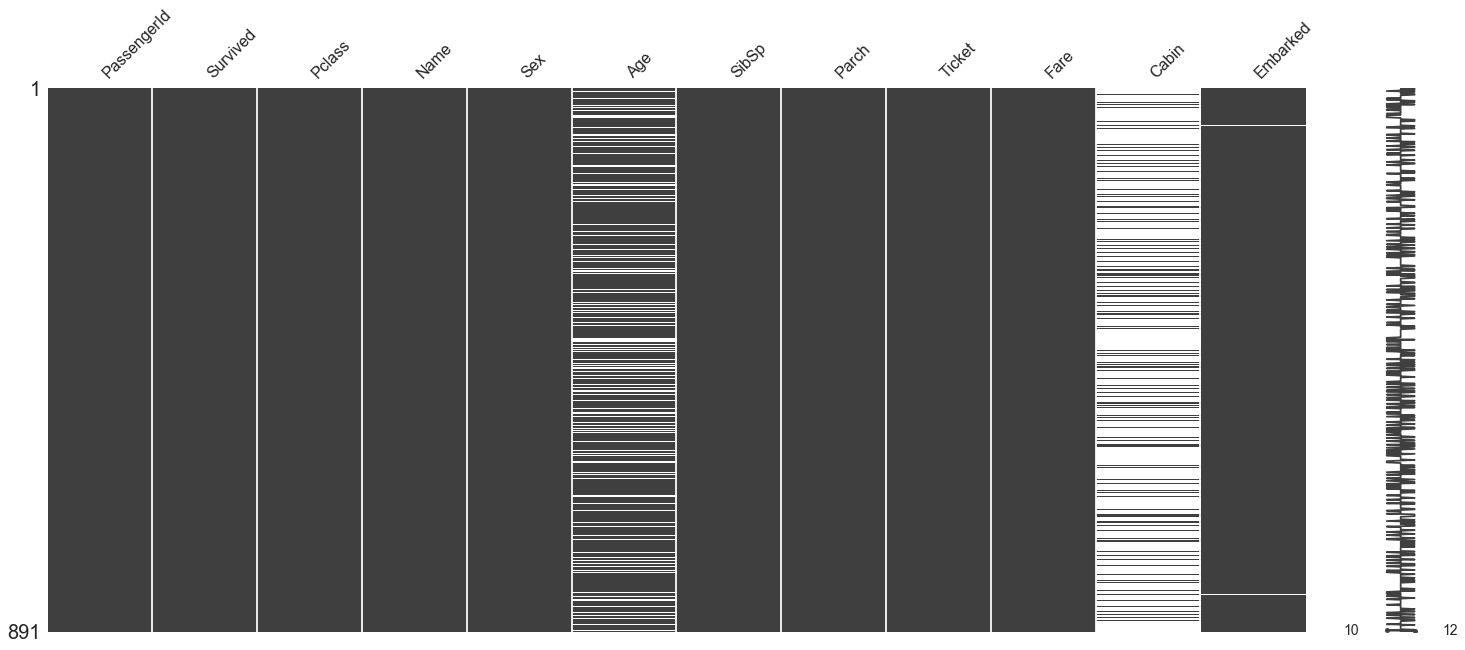

In [13]:
#Vusialization of missing data using missingno library
msno.matrix(data)
plt.show()

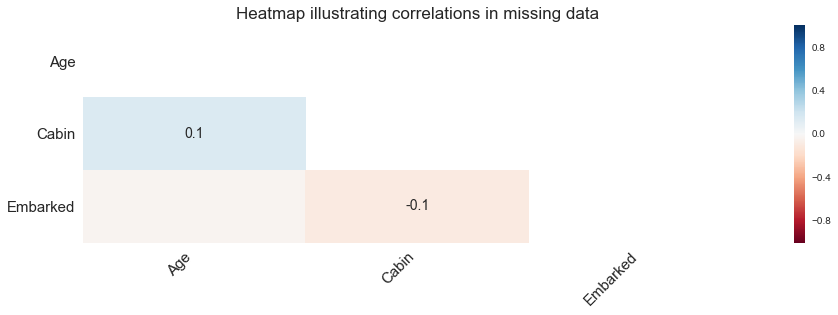

In [14]:
#Heatmap illustrating correlations in missing data
msno.heatmap(data, figsize=(15, 4))
plt.title("Heatmap illustrating correlations in missing data", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

There are no clear correlations in the missing data.

### Age
The age column is important and can provide valuable insights, so it should be included in the model. The missing data will be filled in on the basis of the average age of the passenger in individual classes.

In [15]:
#Passenger classes on the titanic
data["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [16]:
#Average age for passengers in Pclass
print("Average age for passengers in Pclass 1 is:", round(data.loc[data["Pclass"]==1]["Age"].mean(),2))
print("Average age for passengers in Pclass 2 is:", round(data.loc[data["Pclass"]==2]["Age"].mean(),2))
print("Average age for passengers in Pclass 3 is:", round(data.loc[data["Pclass"]==3]["Age"].mean(),2))

Average age for passengers in Pclass 1 is: 38.23
Average age for passengers in Pclass 2 is: 29.88
Average age for passengers in Pclass 3 is: 25.14


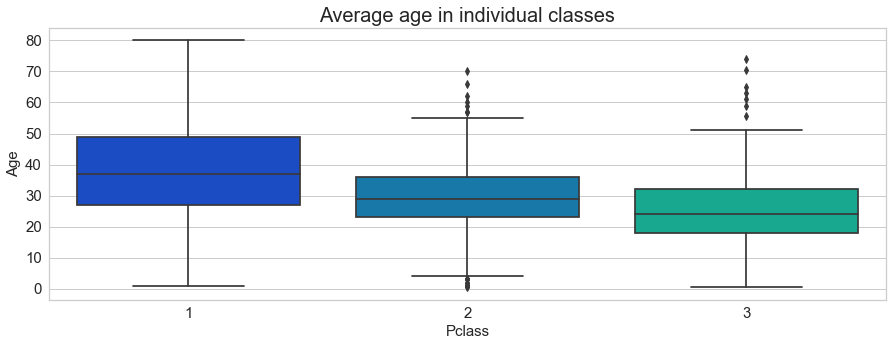

In [17]:
#Boxplot of an average age in individual classes
plt.figure(figsize=(15, 5))
sns.boxplot(x="Pclass",
            y="Age",
            data=data,
            palette="winter").set_title("Average age in individual classes", fontsize=20)
plt.xlabel("Pclass",fontsize=15)
plt.ylabel("Age", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [18]:
#Filling NaN values in Age column based on average age in a Pclass calculated above
data["Age"]=data["Age"].fillna(data["Pclass"].map({1:38,2:30,3:25}))

### Cabin
The cabin column contains mostly missing data, thus it will not contribute anything to the model, the column should be deleted.

In [19]:
#Removal of the column "Cabin"
data.drop(["Cabin"], axis = 1, inplace = True)

### Embarked
The embarked column contains only two missing data, in order to avoid having to delete observations with missing data in the embarked column, these cells will be filled with the most common value in this column.

In [20]:
# most common values in Embarked column
data["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [21]:
#Filling NaN values in Embarked by most common value (S)
data = data.fillna(data["Embarked"].value_counts().index[0])

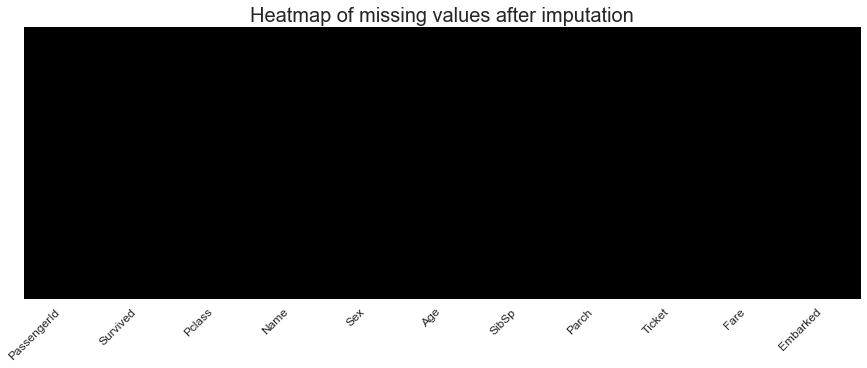

In [22]:
#Update of situation with missing values in dataset after imputation
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap="bone").set_title("Heatmap of missing values after imputation", 
                                   fontsize = 20)
plt.xticks(rotation=45,
           fontsize=12,
           horizontalalignment="right")
plt.show()

In [23]:
#checking of missing data
data.isna().any().any()

False

After imputation of missing data, the dataset does not contain missing data.

### 3.2 Removal of unnecessary features

Variables: PassengerId, Name, Ticket do not appear to be relevant to the target variable, so they will be removed.

In [24]:
#Removal of unnecessary features
data.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)

In [25]:
#Sample of dataset after data clearing
data.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
38,0,3,1,18.0,2,0,18.0,S


## 4. Visualisation and grouping of data

### Analysis of target variable (Survived)

In [26]:
#Basic information about target variable
print("Total number of passengers:", len(data), "\n"
     "Total number of survived passengers:", len(data[data["Survived"]==1]), "\n"
     "Total number of not survived passengers:", len(data[data["Survived"]==0]))
print()
print("Percent of survived passengers:", round(len(data[data["Survived"]==1])/len(data),2)*100)
print("Percent of not survived passengers:", round(len(data[data["Survived"]==0])/len(data),2)*100)

Total number of passengers: 891 
Total number of survived passengers: 342 
Total number of not survived passengers: 549

Percent of survived passengers: 38.0
Percent of not survived passengers: 62.0


In [27]:
#Target variable
print("Distribution of target variable:")
print(data['Survived'].value_counts())
print("-"*40)
print("Distribution of target variable in percent:")
print(round(data['Survived'].value_counts(normalize=True),2))

Distribution of target variable:
0    549
1    342
Name: Survived, dtype: int64
----------------------------------------
Distribution of target variable in percent:
0    0.62
1    0.38
Name: Survived, dtype: float64


Classes are not balanced, so in order to maintain proper proportions between data classes, it is necessary to divide them into use a stratified draw (a good solution is to use the test_train_split function with the **stratify** parameter for this purpose).

### Distribution of passengers in terms of age and gender

The men were the majority on board (577) compared to women (314).

The largest percentage of passengers were about 25 years old. By and large, the most represented age group was between 20 and 30 years old. The age group between 70 and 80 and between 13 and 15 was the least represented.

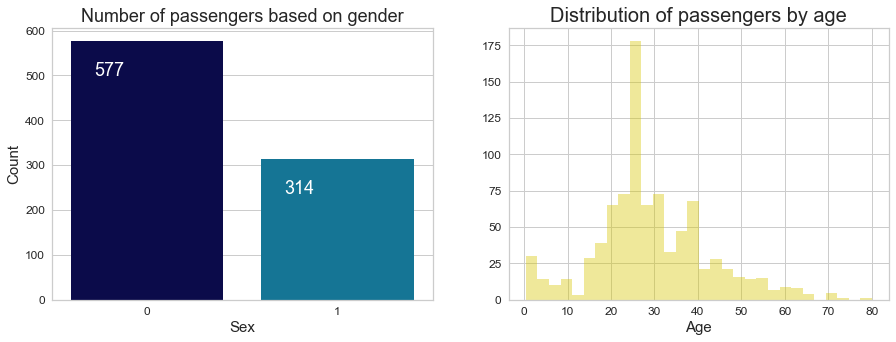

In [28]:
#Basic informations about passengers
plt.figure(figsize=(15, 5))

#Number of passengers in terms of gender 
subplot(1,2,1)
ax=sns.countplot(x = "Sex",
                 data = data,
                 palette="ocean")
ax.set_title("Number of passengers based on gender", fontsize = 18)
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                va="top",
                color="white",
                size=18)

#Passenger distribution by age 
subplot(1,2,2)
sns.distplot(data["Age"].dropna(),
             kde=False,
             bins=30,
             color="y").set_title("Distribution of passengers by age", fontsize = 20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

The largest age range for women on the board was between 20 and 35 years old but in terms of man it was between 20 and 40 years old. On board, young people were definitely predominant.

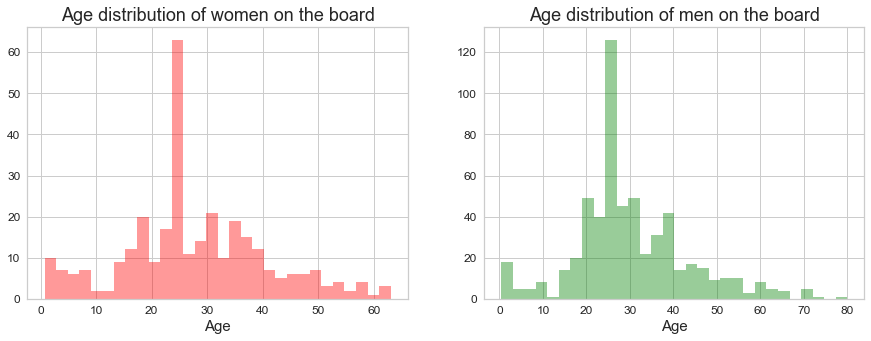

In [29]:
#Distribution of age on the board based on gender
plt.figure(figsize=(15, 5))

subplot(1,2,1)
sns.distplot(data[data["Sex"]==1].Age.dropna(), kde=False,
             bins=30,
             color='Red').set_title("Age distribution of women on the board", fontsize = 18)
plt.xlabel("Age",fontsize=15)
plt.ylabel("", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

subplot(1,2,2)
sns.distplot(data[data["Sex"]==0].Age.dropna(), kde=False,
             bins=30,
             color='green').set_title("Age distribution of men on the board", fontsize = 18)
plt.xlabel("Age",fontsize=15)
plt.ylabel("", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Survival in terms of age and gender

Most of the women who survived were about 25 years old. Generally, most women survived between 15 and 40 years and arount 5 years. In terms of male, most of those who survived were between 25 and 30 years old. Most of people who did not survive the disaster were between 20 and 30 years old. Most of the people who  survived the disaster were between 20 and 40 years old.

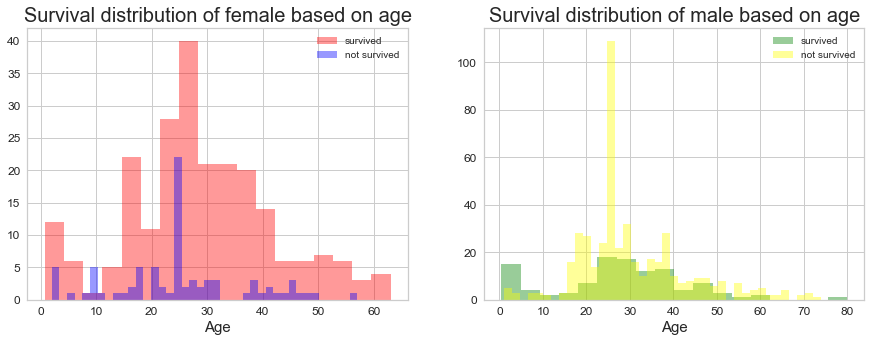

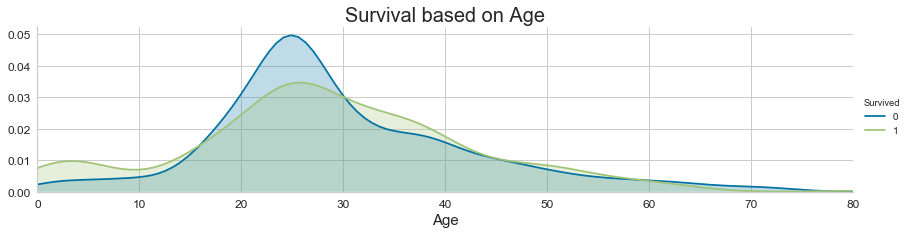

In [30]:
#Distribution plots of the impact of age on the survival of individual sexes
plt.figure(figsize=(15, 5))
survived = "survived"
not_survived = "not survived"
women = data[data["Sex"]==1]
men = data[data["Sex"]==0]

subplot(1,2,1)
female = data[data["Sex"]==1]
female_plot = sns.distplot(women[women["Survived"]==1].Age.dropna(),
                           bins=18,
                           label = survived,
                           kde =False,
                           color="red")
female_plot = sns.distplot(women[women["Survived"]==0].Age.dropna(),
                           bins=40, label = not_survived,
                           kde =False,
                           color="blue")
female_plot.legend()
female_plot.set_title("Survival distribution of female based on age", fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

subplot(1,2,2)
male = data[data["Sex"]==0]
male_plot = sns.distplot(men[men["Survived"]==1].Age.dropna(),
                         bins=18, label = survived,
                         kde = False,
                         color="green")
male_plot = sns.distplot(men[men["Survived"]==0].Age.dropna(),
                         bins=40,
                         label = not_survived,
                         kde = False,
                         color="yellow")
male_plot.legend()
male_plot.set_title("Survival distribution of male based on age", fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


facetGridSurvivalAge = sns.FacetGrid(data,
                      hue="Survived",
                      aspect=4)
facetGridSurvivalAge.map(sns.kdeplot,"Age", shade= True)
facetGridSurvivalAge.set(xlim=(0,data["Age"].max()))
facetGridSurvivalAge.add_legend()
plt.title("Survival based on Age", fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Survival in terms of gender

More than twice as many women than men survived.Taking into account the number of men and women on board 74% of female and 19% of male survived. Unfortunately 468 men and 81 female died.

In [31]:
percSurvivedGender = data[["Sex", "Survived"]].groupby(["Sex"], as_index="Sex").mean().sort_values(by="Survived",
                                                                                                   ascending=False)
percSurvivedGender.round(2)

,Survived
Sex,
1,0.74
0,0.19


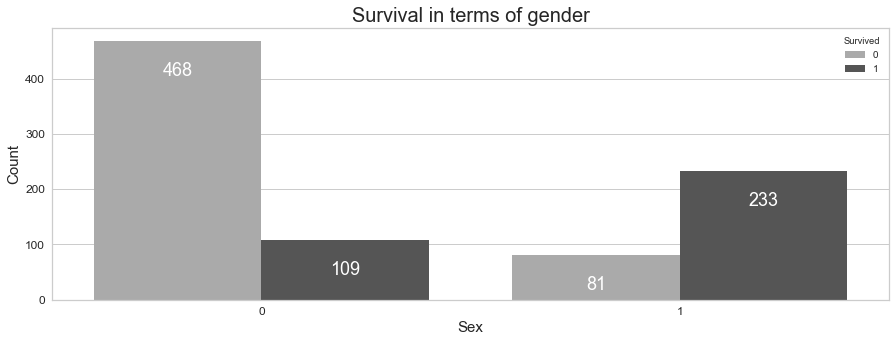

In [32]:
#Survival in terms of gender
plt.figure(figsize=(15, 5))
ax=sns.countplot(x="Sex",
                 hue="Survived",
                 data=data,
                 palette = "binary")
ax.set_title("Survival in terms of gender", fontsize=20)
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                va="top",
                color="white",
                size=18)
plt.show()

### Survival in terms of Pclass

The most men and the most women were in 3th class. By and large, the most significant number of passengers was in 3rd class and at the same time, most people in this class have not survived.

Most of the purchase prices were between 0 and 50 which confirms that most of passengers were in cheaper 3rd class.

In [33]:
percSrvivedPclass = data[["Pclass", "Survived"]].groupby(["Pclass"], as_index="Pclass").mean().sort_values(by="Survived",
                                                                                                        ascending=False)
percSrvivedPclass.round(2)

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


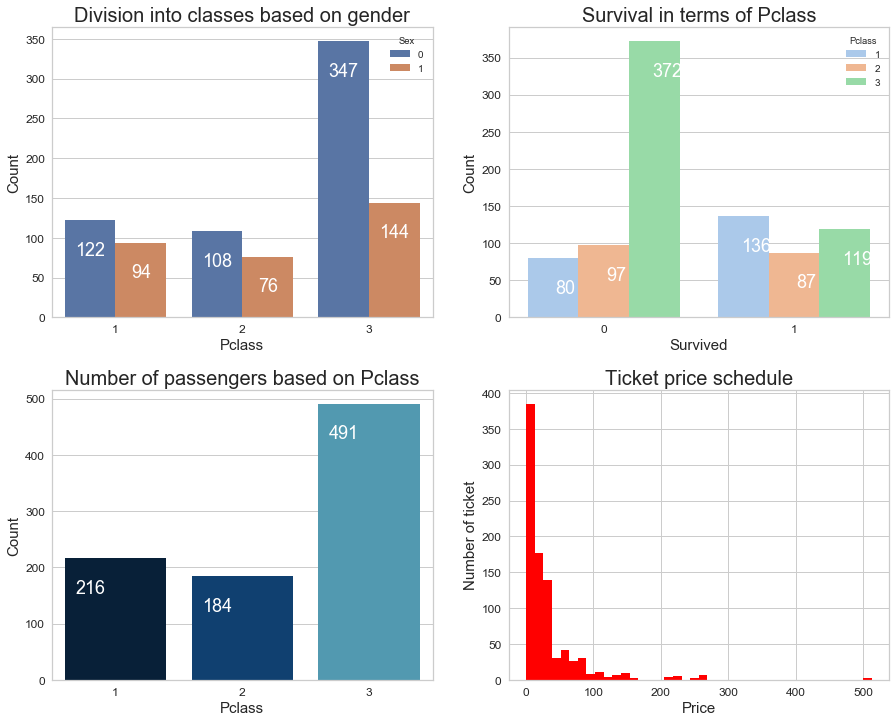

In [34]:
#Survival in terms of Pclass
plt.figure(figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

subplot(2,2,1)
ax=sns.countplot(x="Pclass",
                 hue="Sex",
                 data=data,
                 palette="deep")
ax.set_title("Division into classes based on gender", fontsize=20)
plt.xlabel("Pclass",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                va="top",
                color="white",
                size=18)

subplot(2,2,2)
ax=sns.countplot(x="Survived",
                 hue="Pclass",
                 data=data,
                 palette="pastel")
ax.set_title("Survival in terms of Pclass", fontsize=20)
plt.xlabel("Survived",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                va="top",
                color="white",
                size=18)

subplot(2,2,3)
ax=sns.countplot(x = "Pclass",
                 data = data,
                 palette="ocean")
ax.set_title("Number of passengers based on Pclass", fontsize = 20)
plt.xlabel("Pclass",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                va="top",
                color="white",
                size=18)

subplot(2,2,4)
data["Fare"].hist(color="red",
                  bins=40).set_title("Ticket price schedule", fontsize=20)
plt.xlabel("Price", fontsize=15)
plt.ylabel("Number of ticket", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Survival in terms of Embarked

Most passengers boarded in the port of Southampton and by far the least in Queenstown. the highest percentage of survivors were boarded in the port in Cherbourg.

In [35]:
percSrvivedEmbarked = data[["Embarked","Survived"]].groupby(["Embarked"],
                                                             as_index="Embarked").mean().sort_values(by="Survived",
                                                                                                        ascending=False)
percSrvivedEmbarked.round(2)

,Survived
Embarked,
C,0.55
Q,0.39
S,0.34


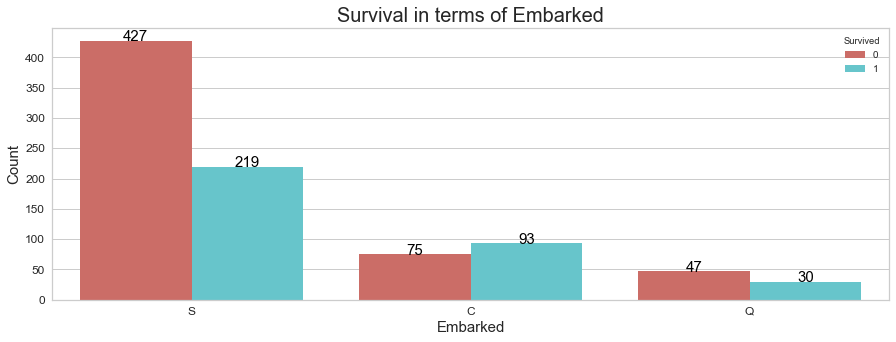

In [36]:
#Survival in terms of Embarked
plt.figure(figsize=(15, 5))
ax=sns.countplot(x="Embarked",
                 hue="Survived",
                 data=data,
                 palette="hls")
ax.set_title("Survival in terms of Embarked", fontsize=20)
plt.xlabel("Embarked",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                color="black",
                size=15,
                ha="center")

plt.show()

In [37]:
print("Number of people embarking in Southampton (S):", data[data["Embarked"] == "S"].shape[0])
print("Number of people embarking in Cherbourg (C):", data[data["Embarked"] == "C"].shape[0])
print("Number of people embarking in Queenstown (Q):", data[data["Embarked"] == "Q"].shape[0])

Number of people embarking in Southampton (S): 646
Number of people embarking in Cherbourg (C): 168
Number of people embarking in Queenstown (Q): 77


## 5. Dummying

Column Embarked requires data type change to numerical data, so as to reach this target was used get_dummies function which changed data to binary values.

In [38]:
#Sample of dataset before dummying
data.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,0,1,0,40.0,0,0,27.7208,C


In [39]:
#Dummying with removing of the first categorical level
data=pd.get_dummies(data,
                    columns=["Embarked"],
                    drop_first=True)

In [40]:
#Sample of dataset after dummying
data.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
844,0,3,0,17.0,0,0,8.6625,0,1


## 6. Machine Learing Models

Six models of machine learning were developed within the project: <br>
Logistic Regression, Decision Tree, Decision Tree with tuning of hyperparameters, Random Forest, Random Forest with tuning of hyperparameters, KNN

### 6.1 Data selection using Pearson correlation coefficient

Selection of data for the model was done using the Pearson correlation coefficient.

In [41]:
#Correlation between independent variables and dependent variable
correlation = data.corr().sort_values("Survived")
abs(correlation["Survived"]).sort_values(ascending=False)

Survived      1.000000
Sex           0.543351
Pclass        0.338481
Fare          0.257307
Embarked_S    0.149683
Parch         0.081629
Age           0.050156
SibSp         0.035322
Embarked_Q    0.003650
Name: Survived, dtype: float64

Variables: Parch, Age, SibSp and Embarked_Q was by far the least correlated with the target variable.

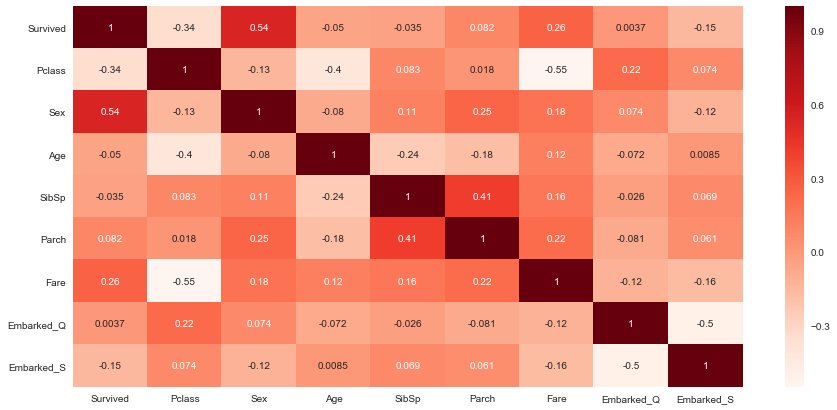

In [42]:
#Heatmap of correlations
plt.figure (figsize = (15,7)) 
cor = data.corr() 
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds) 
plt.show()

No independent variables are significantly correlated with each other, so modeling will not use variables that are least correlated with the target variable: Parch, Age, SibSp and Embarked_Q.

### 6.2 Logistic Regression - model 1 

#### 6.2.1 Logistic Regression - model building

In [43]:
#X contains all features and y contains the target variable
X_model_1 = data.drop(labels=["Survived", "Parch", "Age", "SibSp", "Embarked_Q"], axis=1)
y_model_1 = data["Survived"]

In [44]:
#Division of data into training dataset (60%) and test dataset (40%)
X_train_model_1, X_test_model_1, y_train_model_1, y_test_model_1 = train_test_split(X_model_1,
                                                                                    y_model_1,
                                                                                    test_size = 0.4,
                                                                                    random_state = 0,
                                                                                    stratify=y_model_1)

In [45]:
#Creating classifier
logistic_regression = LogisticRegression(max_iter=10000)
#Training the model
logistic_regression.fit(X_train_model_1, y_train_model_1)

LogisticRegression(max_iter=10000)

In [46]:
#Prediction of test dataset
predictions_model_1 = logistic_regression.predict(X_test_model_1)

In [47]:
#Prediction of training dataset
predictions_model_1_training = logistic_regression.predict(X_train_model_1)

#### 6.2.2 Logistic Regression - model evaluation

#### Confusion Matrix

The upper left and lower right quarters contain correct classification results, and the lower left and upper right are incorrect. The left lower quarter contains false negative results and the right upper quarter contains false positive results.

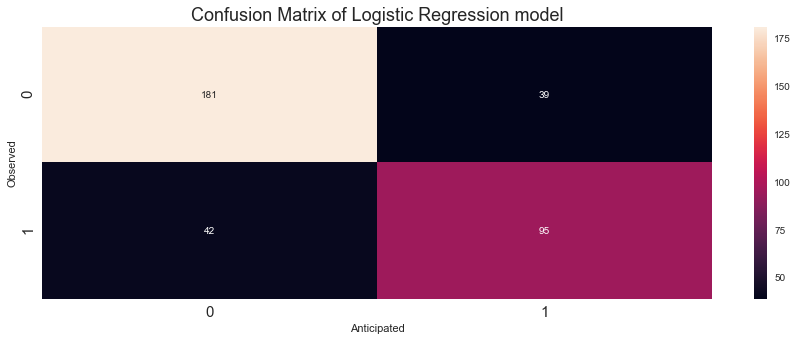

----------------------------------------
True Negative: 181
False Positive: 42
False Negative: 39
True Positive: 95
Correct Predictions 77.31 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.77 
 The Missclassification = 1-Accuracy =  0.23 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.71 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.81 
 Positive Predictive value = TP/(TP+FP) =  0.69 
 Negative predictive Value = TN/(TN+FN) =  0.82 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.76 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.36


In [48]:
#Confusion matrix visualization
plt.figure(figsize=(15,5))
confusion_matrix = pd.crosstab(y_test_model_1,
                               predictions_model_1,
                               rownames=["Observed"],
                               colnames=["Anticipated"])
sns.heatmap(confusion_matrix,
            annot=True,
            fmt = "d")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Confusion Matrix of Logistic Regression model", fontsize= 18)
plt.show()

print("-"*40)

TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)
print("Correct Predictions", round((TN + TP) / len(predictions_model_1) * 100, 2), "%")

print("-"*40)

print("The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ",round((TP+TN)/float(TP+TN+FP+FN),2),"\n",  
"The Missclassification = 1-Accuracy = ",round(1-((TP+TN)/float(TP+TN+FP+FN)),2),"\n",   
"Sensitivity or True Positive Rate = TP/(TP+FN) = ",round(TP/float(TP+FN),2),"\n", 
"Specificity or True Negative Rate = TN/(TN+FP) = ",round(TN/float(TN+FP),2),"\n",
"Positive Predictive value = TP/(TP+FP) = ",round(TP/float(TP+FP),2),"\n",
"Negative predictive Value = TN/(TN+FN) = ",round(TN/float(TN+FN),2),"\n",
"Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ",round(sensitivity/(1-specificity),2),"\n",
"Negative likelihood Ratio = (1-Sensitivity)/Specificity = ", round((1-sensitivity)/specificity,2))

##### Classification Report and Indicators: Accuracy, Recall, Precision, F1

**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [49]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_1, predictions_model_1))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       220
           1       0.71      0.69      0.70       137

    accuracy                           0.77       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357



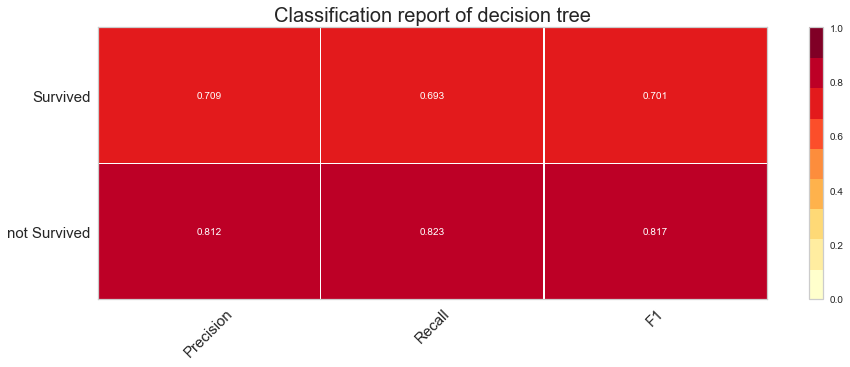

----------------------------------------
Indicators:

Accuracy: 0.77
--------------------
Recall: 0.69
--------------------
Precision: 0.71
--------------------
F1: 0.70


In [50]:
#Classification report and indicators: accuracy, recall, precision, f1
fig, ax = plt.subplots(figsize=(15, 5))
cm_viz = ClassificationReport(logistic_regression,
                              classes=["not Survived", "Survived"])
cm_viz.score(round(X_test_model_1,2), y_test_model_1)
cm_viz.ax.set_title("Classification report of decision tree", fontsize=20)
xlabels = ("Precision", "Recall", "F1")
ax.set_xticks(np.arange(len(xlabels)) + 0.5)
ax.set_xticklabels(xlabels, rotation=45, fontsize=15)
ax.set_yticks(np.arange(len(cm_viz.classes)) + 0.5)
ax.set_yticklabels(cm_viz.classes, fontsize=15)

plt.show()

print("-"*40)

print("Indicators:")
print("")
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_model_1 = round(accuracy_score(y_test_model_1, predictions_model_1),2)
print("Accuracy: %0.2f" % (accuracy_model_1))
print("-"*20)
#Recall
from sklearn.metrics import recall_score
recall_model_1 = round(recall_score(y_test_model_1, predictions_model_1),2)
print("Recall: %0.2f" % (recall_model_1))
print("-"*20)
#Precision
from sklearn.metrics import precision_score
precision_model_1 = round(precision_score(y_test_model_1, predictions_model_1),2)
print("Precision: %0.2f" % (precision_model_1))
print("-"*20)
#F1
from sklearn.metrics import f1_score
f1_model_1 = round(f1_score(y_test_model_1, predictions_model_1),2)
print("F1: %0.2f" % (f1_model_1))

#### ROC curve
Receiver Operating Characteristic — illustrates the relationship between the percentage of true positive results (sensitivity) and the percentage of false positive results (inverse specificity). <br>
Graph should be convex to the left upper corner. The more accurate the model, the more the curve is shifted left and up. The diagonal represents a classifier generating random results. Field under the curve is an indicator describing the efficiency of the model. 

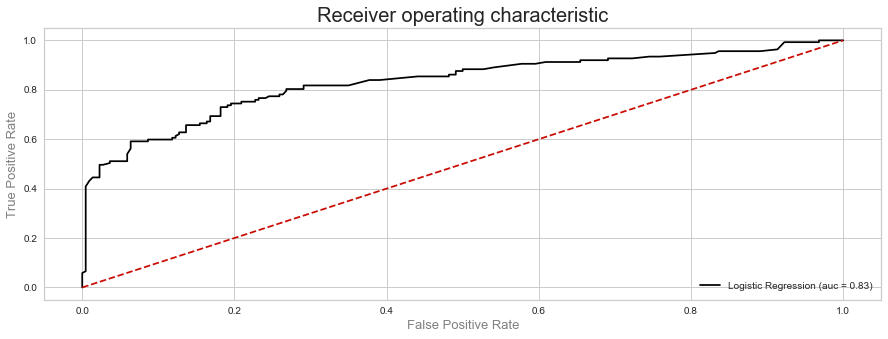

In [51]:
#ROC curve plot
plt.figure(figsize=(15,5))
y_pred_proba_model_1 = logistic_regression.predict_proba(X_test_model_1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_model_1,  y_pred_proba_model_1)
auc = metrics.roc_auc_score(y_test_model_1, y_pred_proba_model_1)
plt.plot(fpr, tpr, label="Logistic Regression (auc = %0.2f)" % auc, color="black")
plt.xlabel("False Positive Rate",color="grey", fontsize = 13)
plt.ylabel("True Positive Rate",color="grey", fontsize = 13)
plt.title("Receiver operating characteristic", fontsize=20)
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],"r--")
plt.show()

#### AUC (Area under curve)

Area under the ROC curve is 0.83, which is a very good result and illustrates high efficiency of the model.

In [52]:
#Calculation of area under the ROC curve and Gini Index
y_pred_proba_model_1 = logistic_regression.predict_proba(X_test_model_1)[::,1]
AUC_model_1 = round(roc_auc_score(y_test_model_1, y_pred_proba_model_1),2)
print("AUC (Area under the curve) is:", AUC_model_1)

AUC (Area under the curve) is: 0.83


#### Comparison of test and training dataset results
The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [53]:
accuracy_model_1_training = accuracy_score(y_train_model_1, predictions_model_1_training)
recall_model_1_training = recall_score(y_train_model_1, predictions_model_1_training)
precision_model_1_training = precision_score(y_train_model_1, predictions_model_1_training)
f1_model_1_training = f1_score(y_train_model_1, predictions_model_1_training)

In [54]:
results_comparison_train_test_model_1 = pd.DataFrame({"dataset" : ["Training dataset",
                                                                   "Test dataset"],
                                                      "Accuracy" : [accuracy_model_1_training,
                                                                    accuracy_model_1],
                                                     "Recall" : [recall_model_1_training,
                                                                 recall_model_1],
                                                     "Precision" : [precision_model_1_training,
                                                                    precision_model_1],
                                                     "F1" : [f1_model_1_training,
                                                             f1_model_1]}).set_index("dataset")
results_comparison_train_test_model_1.round(2)

,Accuracy,Recall,Precision,F1
dataset,,,,
Training dataset,0.78,0.69,0.72,0.71
Test dataset,0.77,0.69,0.71,0.70


<font size="3"> Results on training and test dataset do not differ significantly from each other. It means that there is no overfitting.

#### Feature importance in Logistic Regression

Among the variables contained in the model, the most important were gender and the class in which the passengers travelled.

In [55]:
#Coefficient of the features
lr_importances = np.abs(logistic_regression.coef_)[0]
lr_indices = np.argsort(lr_importances)[::-1]

#Features ranking
print("Features importance:")
print()
lr_labels = []
for f in range(X_train_model_1.shape[1]):
    lr_labels.append(X_train_model_1.columns.values[lr_indices[f]])
    print(lr_labels[f], round(lr_importances[lr_indices[f]],3))

Features importance:

Sex 2.465
Pclass 0.87
Embarked_S 0.124
Fare 0.003


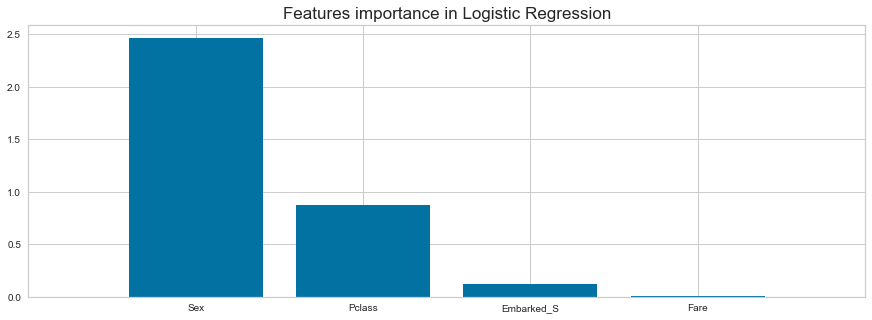

In [56]:
#Bar plot of variable importance
plt.figure(figsize=(15,5))
plt.bar(range(X_train_model_1.shape[1]),
        lr_importances[lr_indices],
        color="b",
        align="center")
plt.title("Features importance in Logistic Regression", fontsize=17)
plt.xticks(range(X_train_model_1.shape[1]), lr_labels)
plt.xlim([-1, X_train_model_1.shape[1]])
plt.show()

#### 6.2.3 Prediction based on test dataset

In [57]:
#Prediction on the test dataset
prediction_model_1=logistic_regression.predict_proba(X_test_model_1)[:,:]*100
prediction_model_1=pd.DataFrame(data=prediction_model_1, 
                         columns=["Probability of not Survived (0)","Probability of Survived (1)"])
prediction_model_1.head(5).round(2)

,Probability of not Survived (0),Probability of Survived (1)
0,78.68,21.32
1,21.74,78.26
2,2.09,97.91
3,11.04,88.96
4,89.97,10.03


In [58]:
#Join base table data with prediction table
LogisticRegressionPrediction = data.join(prediction_model_1).round(2)
LogisticRegressionPrediction.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Probability of not Survived (0),Probability of Survived (1)
0,0,3,0,22.0,1,0,7.25,0,1,78.68,21.32
1,1,1,1,38.0,1,0,71.28,0,0,21.74,78.26
2,1,3,1,26.0,0,0,7.92,0,1,2.09,97.91
3,1,1,1,35.0,1,0,53.10,0,1,11.04,88.96
4,0,3,0,35.0,0,0,8.05,0,1,89.97,10.03


#### 6.2.4 Export of model prediction to excel

In [59]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file 
LogisticRegressionPrediction.to_excel("Prediction of the Logistic Regression model.xlsx",
                                      index=False,
                                      header=True)

### 6.3 Decision Tree - model 2

#### 6.3.1 Decision Tree - model building

In [60]:
#X contains all features and y contains the target variable
X_model_2 = data.drop(labels=["Survived", "Parch", "Age", "SibSp", "Embarked_Q"], axis=1)
y_model_2 = data["Survived"]

In [61]:
#Division of data into training dataset (60%) and test dataset (40%)
X_train_model_2, X_test_model_2, y_train_model_2, y_test_model_2 = train_test_split(X_model_2,
                                                                                    y_model_2,
                                                                                    test_size = 0.4,
                                                                                    random_state = 1,
                                                                                    stratify=y_model_2)

In [62]:
#Creating classifier
decision_tree = DecisionTreeClassifier(criterion = "gini",
                                       max_depth=4,
                                       min_samples_leaf=1)
#Training the model
decision_tree.fit(X = X_model_2, y = y_model_2)

DecisionTreeClassifier(max_depth=4)

In [63]:
#Prediction of test dataset
predictions_model_2 = decision_tree.predict(X_test_model_2)

In [64]:
#Prediction of training dataset
predictions_model_2_training = decision_tree.predict(X_train_model_2)

#### 6.3.2 Decision tree - visualization

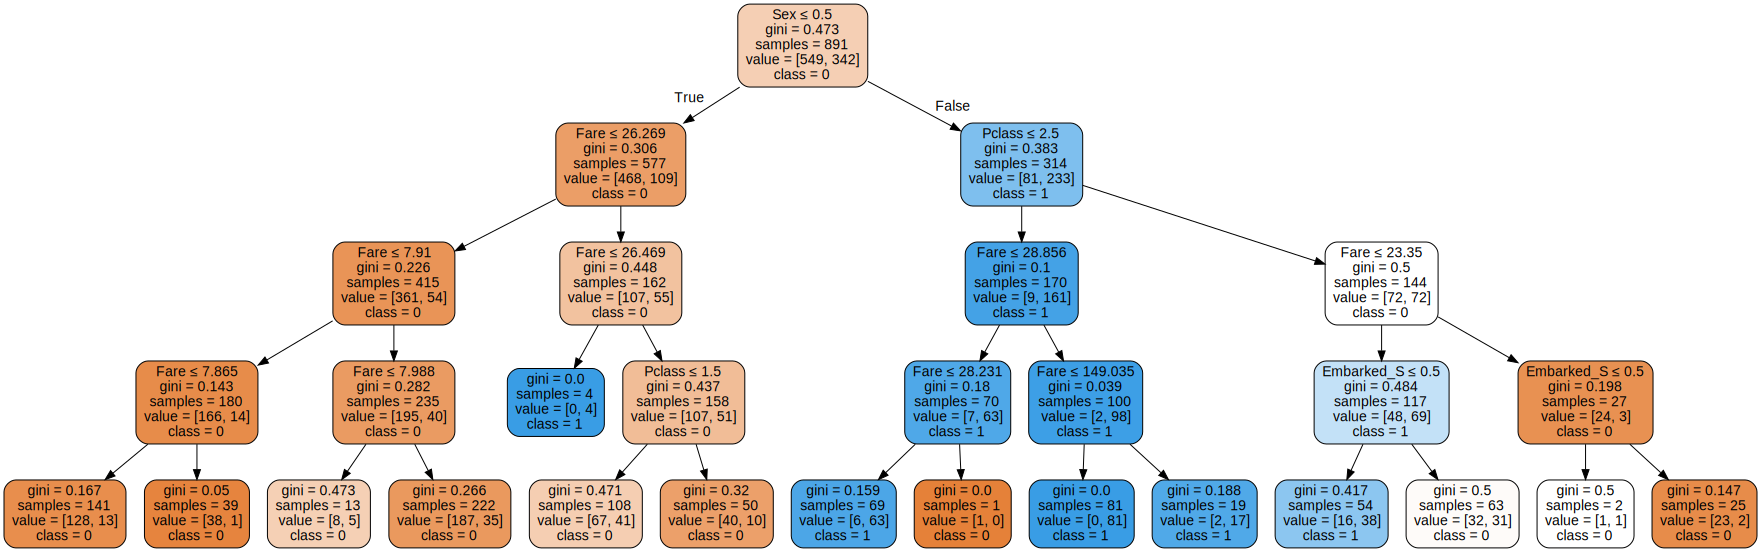

In [65]:
#Creating decision tree graph
decisionTreeData = export_graphviz(decision_tree,
                                   out_file=None,
                                   feature_names=X_model_2.columns,
                                   class_names=["0", "1"],
                                   filled=True,rounded=True,
                                   special_characters=True)
decisionTreeVisualization = graphviz.Source(decisionTreeData)
decisionTreeVisualization

#### 6.3.3 Decision Tree - model evaluation

#### Confusion Matrix

The upper left and lower right quarters contain correct classification results, and the lower left and upper right are incorrect. The left lower quarter contains false negative results and the right upper quarter contains false positive results.

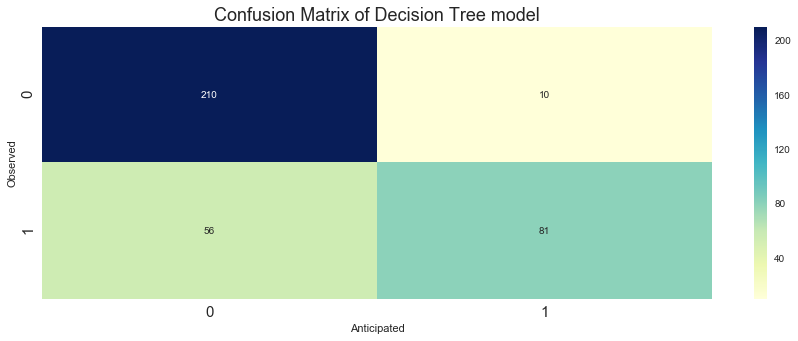

----------------------------------------
True Negative: 210
False Positive: 56
False Negative: 10
True Positive: 81
Correct Predictions 81.51 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.82 
 The Missclassification = 1-Accuracy =  0.18 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.89 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.79 
 Positive Predictive value = TP/(TP+FP) =  0.59 
 Negative predictive Value = TN/(TN+FN) =  0.95 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4.23 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.14


In [66]:
#Confusion Matrix visualization
plt.figure(figsize=(15,5))
confusion_matrix = pd.crosstab(y_test_model_2,
                               predictions_model_2,
                               rownames=["Observed"],
                               colnames=["Anticipated"])
sns.heatmap(confusion_matrix,
            annot=True,
            fmt = "d",
            cmap="YlGnBu",
            xticklabels=["0","1"],
            yticklabels=["0","1"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Confusion Matrix of Decision Tree model", fontsize= 18)
plt.show()

print("-"*40)

TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)
print("Correct Predictions", round((TN + TP) / len(predictions_model_2) * 100, 2), "%")

print("-"*40)

print("The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ",round((TP+TN)/float(TP+TN+FP+FN),2),"\n",  
"The Missclassification = 1-Accuracy = ",round(1-((TP+TN)/float(TP+TN+FP+FN)),2),"\n",   
"Sensitivity or True Positive Rate = TP/(TP+FN) = ",round(TP/float(TP+FN),2),"\n", 
"Specificity or True Negative Rate = TN/(TN+FP) = ",round(TN/float(TN+FP),2),"\n",
"Positive Predictive value = TP/(TP+FP) = ",round(TP/float(TP+FP),2),"\n",
"Negative predictive Value = TN/(TN+FN) = ",round(TN/float(TN+FN),2),"\n",
"Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ",round(sensitivity/(1-specificity),2),"\n",
"Negative likelihood Ratio = (1-Sensitivity)/Specificity = ", round((1-sensitivity)/specificity,2))

##### Classification Report and Indicators: Accuracy, Recall, Precision, F1

**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [67]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_2, predictions_model_2))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       220
           1       0.89      0.59      0.71       137

    accuracy                           0.82       357
   macro avg       0.84      0.77      0.79       357
weighted avg       0.83      0.82      0.81       357



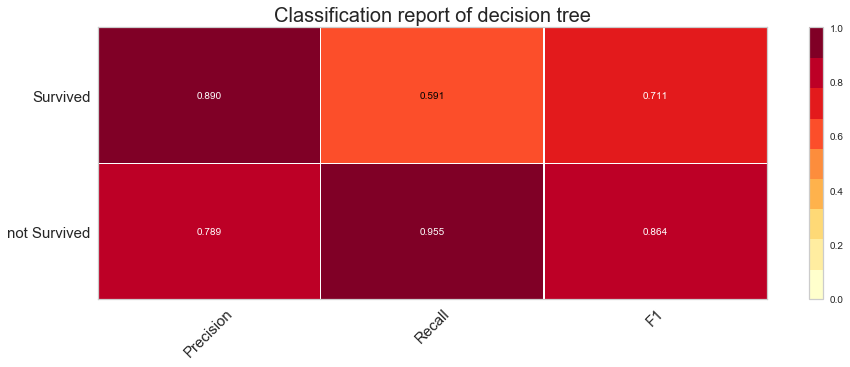

----------------------------------------
Indicators:

Accuracy: 0.82
--------------------
Recall: 0.59
--------------------
Precision: 0.89
--------------------
F1: 0.71


In [68]:
#Classification report and indicators: accuracy, recall, precision, f1
fig, ax = plt.subplots(figsize=(15, 5))
cm_viz = ClassificationReport(decision_tree,
                              classes=["not Survived", "Survived"])
cm_viz.score(round(X_test_model_2,2), y_test_model_2)
cm_viz.ax.set_title("Classification report of decision tree", fontsize=20)
xlabels = ("Precision", "Recall", "F1")
ax.set_xticks(np.arange(len(xlabels)) + 0.5)
ax.set_xticklabels(xlabels, rotation=45, fontsize=15)
ax.set_yticks(np.arange(len(cm_viz.classes)) + 0.5)
ax.set_yticklabels(cm_viz.classes, fontsize=15)

plt.show()

print("-"*40)

print("Indicators:")
print("")
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_model_2 = round(accuracy_score(y_test_model_2, predictions_model_2),2)
print("Accuracy: %0.2f" % (accuracy_model_2))
print("-"*20)
#Recall
from sklearn.metrics import recall_score
recall_model_2 = round(recall_score(y_test_model_2, predictions_model_2),2)
print("Recall: %0.2f" % (recall_model_2))
print("-"*20)
#Precision
from sklearn.metrics import precision_score
precision_model_2 = round(precision_score(y_test_model_2, predictions_model_2),2)
print("Precision: %0.2f" % (precision_model_2))
print("-"*20)
#F1
from sklearn.metrics import f1_score
f1_model_2 = round(f1_score(y_test_model_2, predictions_model_2),2)
print("F1: %0.2f" % (f1_model_2))

#### AUC (Area under curve)

Area under the ROC curve is 0.86, which is a very good result and illustrates high efficiency of the model.

In [69]:
#Calculation of area under the ROC curve
y_pred_proba_model_2 = decision_tree.predict_proba(X_test_model_2)[::,1]
AUC_model_2 = round(roc_auc_score(y_test_model_2, y_pred_proba_model_2),2)
print("AUC (Area under the curve) is:", AUC_model_2)

AUC (Area under the curve) is: 0.86


#### Comparison of test and training dataset results
The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [70]:
accuracy_model_2_training = accuracy_score(y_train_model_2, predictions_model_2_training)
recall_model_2_training = recall_score(y_train_model_2, predictions_model_2_training)
precision_model_2_training = precision_score(y_train_model_2, predictions_model_2_training)
f1_model_2_training = f1_score(y_train_model_2, predictions_model_2_training)

In [71]:
results_comparison_train_test_model_2 = pd.DataFrame({"dataset" : ["Training dataset",
                                                                   "Test dataset"],
                                                      "Accuracy" : [accuracy_model_2_training,
                                                                    accuracy_model_2],
                                                     "Recall" : [recall_model_2_training,
                                                                 recall_model_2],
                                                     "Precision" : [precision_model_2_training,
                                                                    precision_model_2],
                                                     "F1" : [f1_model_2_training,
                                                             f1_model_2]}).set_index("dataset")
results_comparison_train_test_model_2.round(2)

,Accuracy,Recall,Precision,F1
dataset,,,,
Training dataset,0.82,0.60,0.90,0.72
Test dataset,0.82,0.59,0.89,0.71


<font size="3"> Results on training and test dataset do not differ significantly from each other. It means that there is no overfitting.

#### Feature importance in decision dree
Among the variables included in the model gender, class and ticket price turned out to be the most important.

In [72]:
#DataFrame of futures importance
importances_decision_tree = pd.DataFrame({"Feature":X_train_model_2.columns,
                            "Importance":np.round(decision_tree.feature_importances_,3)})
importances_decision_tree = importances_decision_tree.sort_values("Importance",ascending=False).set_index("Feature")
importances_decision_tree.head(15)

,Importance
Feature,
Sex,0.653
Pclass,0.175
Fare,0.155
Embarked_S,0.017


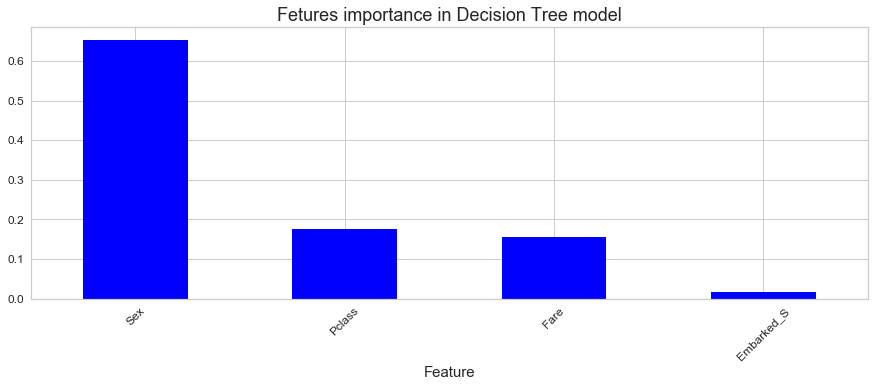

In [73]:
#Visualization of features importance
importances_decision_tree.plot.bar(color="blue", figsize=(15,5))
plt.title("Fetures importance in Decision Tree model", fontsize=18)
plt.xlabel("Feature",fontsize=15)
plt.ylabel("")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend("")

plt.show()

#### 6.3.4 Prediction based on test dataset

In [74]:
#Prediction on the test dataset
prediction_model_2=logistic_regression.predict_proba(X_test_model_2)[:,:]*100
prediction_model_2=pd.DataFrame(data=prediction_model_2, 
                         columns=["Probability of not Survived (0)","Probability of Survived (1)"])
prediction_model_2.head(5).round(2)

,Probability of not Survived (0),Probability of Survived (1)
0,9.49,90.51
1,57.20,42.80
2,43.25,56.75
3,78.68,21.32
4,89.65,10.35


In [75]:
#Join base table data with prediction table
DecisionTreePrediction = data.join(prediction_model_2).round(2)
DecisionTreePrediction.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Probability of not Survived (0),Probability of Survived (1)
0,0,3,0,22.0,1,0,7.25,0,1,9.49,90.51
1,1,1,1,38.0,1,0,71.28,0,0,57.20,42.80
2,1,3,1,26.0,0,0,7.92,0,1,43.25,56.75
3,1,1,1,35.0,1,0,53.10,0,1,78.68,21.32
4,0,3,0,35.0,0,0,8.05,0,1,89.65,10.35


#### 6.3.5 Export of model prediction to excel

In [76]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file 
DecisionTreePrediction.to_excel("Prediction of the Decision Tree model.xlsx",
                                index=False,
                                header=True)

#### 6.3.6 Decision tree - tuning of hyperparameters (Grid Search) - model 2

In [77]:
#Dictionary of parameters designed for testing combinations giving the highest performance
grid_parameters = {"criterion": ["gini", "entropy"],
                  "max_depth": [4,5,6,7,8], 
                   "min_samples_split": [2,3,4], 
                   "min_samples_leaf": [1,2,3]
                  }

There was used Cross Validation. By default, the CV is 5, so for each iteration a total of 5 models was built. Average value was a result.

In [78]:
#Looking for the best combination of parameters
grid_search = GridSearchCV(estimator=decision_tree,
                           param_grid=grid_parameters,
                           cv=5)

In [79]:
grid_search.fit(X_train_model_2, y_train_model_2) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [80]:
#Best values of hiperparameters
best_parameters = grid_search.best_params_  
print(best_parameters) 

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [81]:
#Creating classifier with best parameters
decision_tree_2_HPM = DecisionTreeClassifier(criterion = "entropy",
                                             max_depth=8,
                                             min_samples_leaf=1,
                                             min_samples_split=2)
decision_tree_2_HPM.fit(X = X_model_2, y = y_model_2)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [82]:
#Prediction of test dataset
predictions_model_2_HPM = decision_tree_2_HPM.predict(X_test_model_2)

In [83]:
#Prediction of training dataset
predictions_model_2_HPM_training = decision_tree_2_HPM.predict(X_train_model_2)

#### 6.3.7 Decision tree - visualization after tuning of hyperparameters

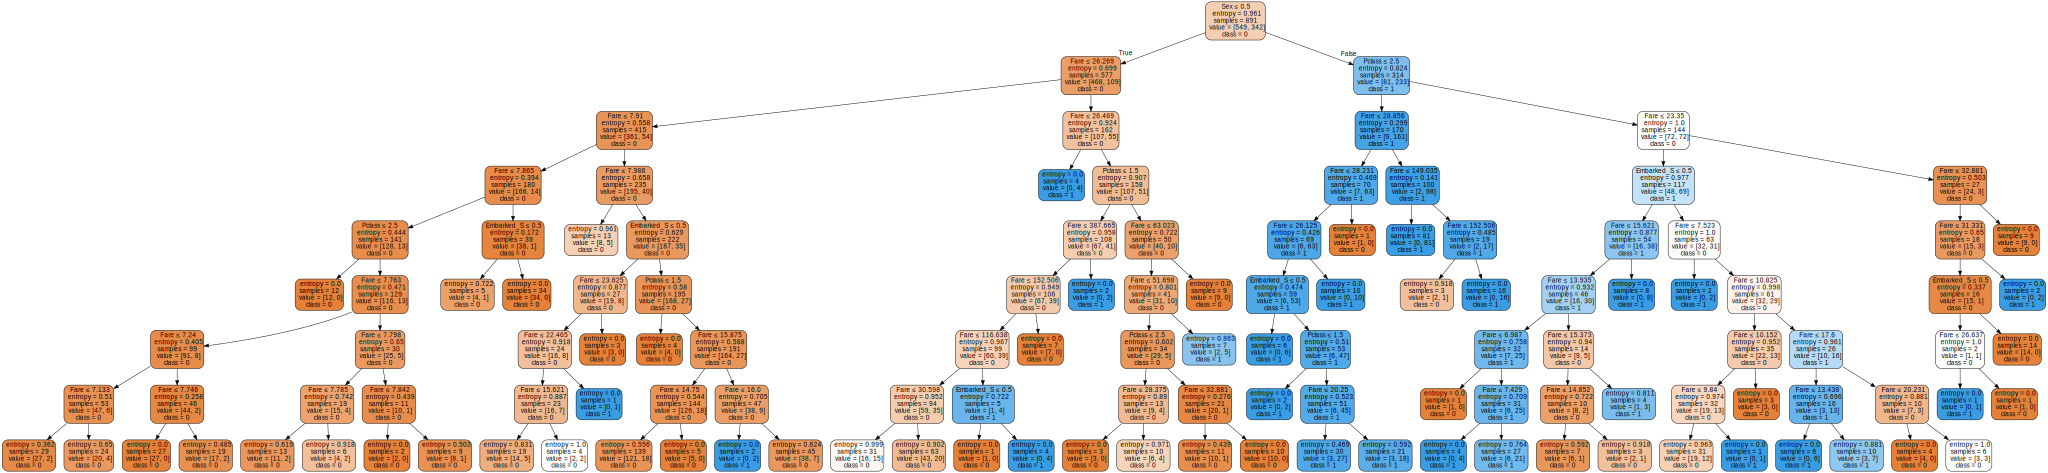

In [84]:
#Creating decision tree graph
decisionTreeData_2 = export_graphviz(decision_tree_2_HPM,
                                   out_file=None,
                                   feature_names=X_model_2.columns,
                                   class_names=["0", "1"],
                                   filled=True,
                                     rounded=True,
                                     special_characters=True)
decisionTreeVisualization2 = graphviz.Source(decisionTreeData_2)
decisionTreeVisualization2

#### 6.3.8 Decision Tree - model evaluation AFTER tuning of hyperparameters

#### Confusion Matrix

The upper left and lower right quarters contain correct classification results, and the lower left and upper right are incorrect. The left lower quarter contains false negative results and the right upper quarter contains false positive results.

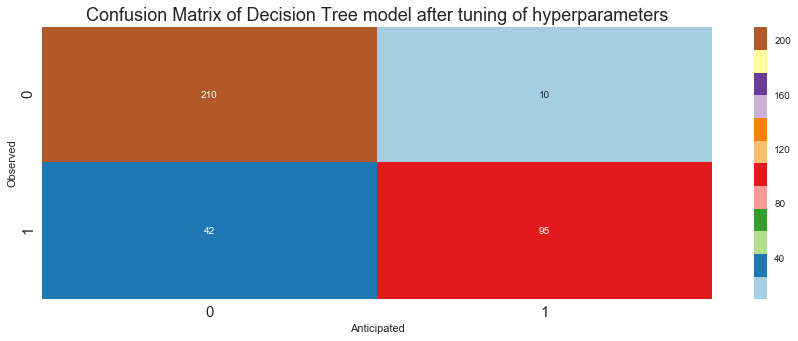

----------------------------------------
True Negative: 210
False Positive: 42
False Negative: 10
True Positive: 95
Correct Predictions 85.43 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.85 
 The Missclassification = 1-Accuracy =  0.15 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.83 
 Positive Predictive value = TP/(TP+FP) =  0.69 
 Negative predictive Value = TN/(TN+FN) =  0.95 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  5.43 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.11


In [85]:
plt.figure(figsize=(15,5))
confusion_matrix = pd.crosstab(y_test_model_2,
                               predictions_model_2_HPM,
                               rownames=["Observed"],
                               colnames=["Anticipated"])
sns.heatmap(confusion_matrix,
            annot=True,
            fmt = "d",
            cmap="Paired",
            xticklabels=["0","1"],
            yticklabels=["0","1"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Confusion Matrix of Decision Tree model after tuning of hyperparameters", fontsize= 18)
plt.show()

print("-"*40)

TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)
print("Correct Predictions", round((TN + TP) / len(predictions_model_2_HPM) * 100, 2), "%")

print("-"*40)

print("The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ",round((TP+TN)/float(TP+TN+FP+FN),2),"\n",  
"The Missclassification = 1-Accuracy = ",round(1-((TP+TN)/float(TP+TN+FP+FN)),2),"\n",   
"Sensitivity or True Positive Rate = TP/(TP+FN) = ",round(TP/float(TP+FN),2),"\n", 
"Specificity or True Negative Rate = TN/(TN+FP) = ",round(TN/float(TN+FP),2),"\n",
"Positive Predictive value = TP/(TP+FP) = ",round(TP/float(TP+FP),2),"\n",
"Negative predictive Value = TN/(TN+FN) = ",round(TN/float(TN+FN),2),"\n",
"Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ",round(sensitivity/(1-specificity),2),"\n",
"Negative likelihood Ratio = (1-Sensitivity)/Specificity = ", round((1-sensitivity)/specificity,2))

#### Classification Report and Indicators: Accuracy, Recall, Precision, F1

**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [86]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_2, predictions_model_2_HPM))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       220
           1       0.90      0.69      0.79       137

    accuracy                           0.85       357
   macro avg       0.87      0.82      0.84       357
weighted avg       0.86      0.85      0.85       357



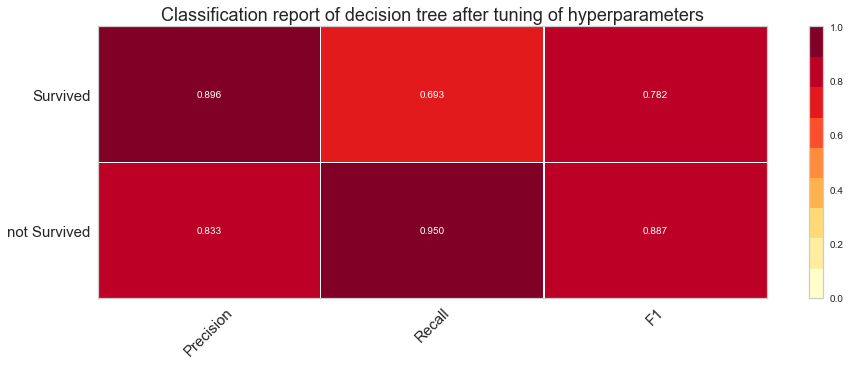

Indicators:

Accuracy: 0.85
--------------------
Recall: 0.69
--------------------
Precision: 0.90
--------------------
F1: 0.79


In [87]:
#Classification report and indicators: accuracy, recall, precision, f1
fig, ax = plt.subplots(figsize=(15, 5))
cm_viz = ClassificationReport(decision_tree_2_HPM,
                              classes=["not Survived", "Survived"])
cm_viz.score(round(X_test_model_2,2), y_test_model_2)
cm_viz.ax.set_title("Classification report of decision tree after tuning of hyperparameters", fontsize=18)
xlabels = ("Precision", "Recall", "F1")
ax.set_xticks(np.arange(len(xlabels)) + 0.5)
ax.set_xticklabels(xlabels, rotation=45, fontsize=15)
ax.set_yticks(np.arange(len(cm_viz.classes)) + 0.5)
ax.set_yticklabels(cm_viz.classes, fontsize=15)

plt.show()

print("Indicators:")
print("")
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_model_2_HPM = round(accuracy_score(y_test_model_2, predictions_model_2_HPM),2)
print("Accuracy: %0.2f" % (accuracy_model_2_HPM))
print("-"*20)
#Recall
from sklearn.metrics import recall_score
recall_model_2_HPM = round(recall_score(y_test_model_2, predictions_model_2_HPM),2)
print("Recall: %0.2f" % (recall_model_2_HPM))
print("-"*20)
#Precision
from sklearn.metrics import precision_score
precision_model_2_HPM = round(precision_score(y_test_model_2, predictions_model_2_HPM),2)
print("Precision: %0.2f" % (precision_model_2_HPM))
print("-"*20)
#F1
from sklearn.metrics import f1_score
f1_model_2_HPM = round(f1_score(y_test_model_2, predictions_model_2_HPM),2)
print("F1: %0.2f" % (f1_model_2_HPM))

#### ROC curve
Receiver Operating Characteristic — illustrates the relationship between the percentage of true positive results (sensitivity) and the percentage of false positive results (inverse specificity). <br>
Graph should be convex to the left upper corner. The more accurate the model, the more the curve is shifted left and up. The diagonal represents a classifier generating random results. Field under the curve is an indicator describing the efficiency of the model. 

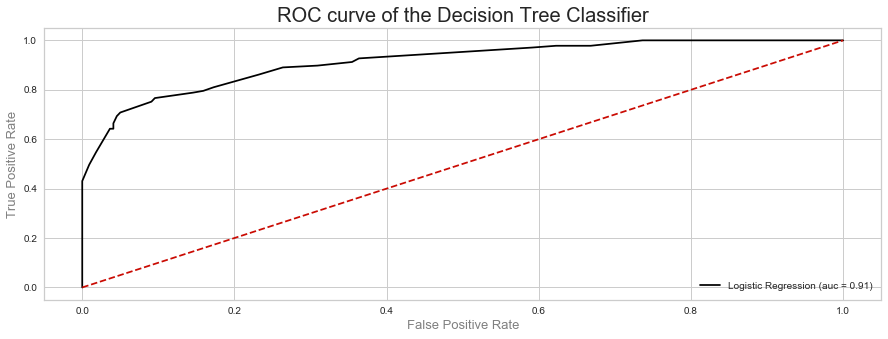

In [88]:
#ROC curve plot
plt.figure(figsize=(15,5))
y_pred_proba_model_2 = decision_tree_2_HPM.predict_proba(X_test_model_2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_model_2,  y_pred_proba_model_2)
auc = metrics.roc_auc_score(y_test_model_2, y_pred_proba_model_2)
plt.plot(fpr, tpr, label="Logistic Regression (auc = %0.2f)" % auc, color="black")
plt.xlabel("False Positive Rate",color="grey", fontsize = 13)
plt.ylabel("True Positive Rate",color="grey", fontsize = 13)
plt.title("ROC curve of the Decision Tree Classifier", fontsize=20)
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

#### AUC (Area under curve)

Area under the ROC curve is 0.91, which is a very good result and illustrates high efficiency of the model.

In [89]:
#Calculation of area under the ROC curve
y_pred_proba_model_2_HPM = decision_tree_2_HPM.predict_proba(X_test_model_2)[::,1]
AUC_model_2_HPM = round(roc_auc_score(y_test_model_2, y_pred_proba_model_2_HPM),2)
print("AUC (Area under the curve) is:", AUC_model_2_HPM)

AUC (Area under the curve) is: 0.91


#### Precision-recall curve

Classification is a balanced process of finding the data you need (sensitivity) while at the same time limiting erroneous results (precision). Usually you have to find a compromise between these concepts. The higher the sensitivity, the lower the precision and vice versa.

Average precision: 0.73


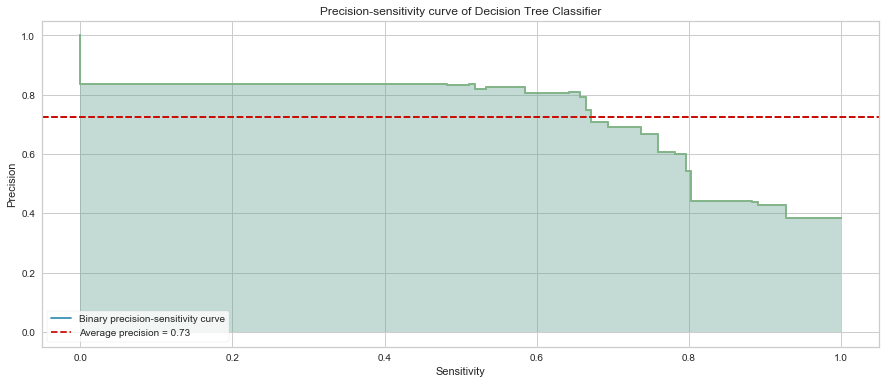

In [90]:
#Precision-recall curve
fig, ax = plt.subplots(figsize=(15, 6))
viz = PrecisionRecallCurve(DecisionTreeClassifier(max_depth=6))
viz.fit(X_train_model_2, y_train_model_2)
print("Average precision:",round(viz.score(X_test_model_2, y_test_model_2),2))
viz.ax.set(title="Precision-sensitivity curve of Decision Tree Classifier",
           xlabel="Sensitivity",
           ylabel="Precision")
ax.legend(("Binary precision-sensitivity curve",
           "Average precision = {:0.2f}".format(viz.score(X_test_model_2,y_test_model_2))),
          frameon=True,
          loc="lower left")

plt.show()

#### Accumulated profit curve

The binary classifier can be evaluated using the accumulated profit curve, which illustrates the relationship between the percentage of true positive results (sensitivity) and the percentage of positive forecasts. The purpose of this curve is to sort all classifications according to the predicted probability. <br>
On the horizontal axis there is a percentage of the forecast
positive results. Vertical axis represents sensitivity (percentage of results truly positive). <br>

If we rank passengers according to their probability of survival and select those whose chances are no more than 20%, it will turn out that this is 50% of all passengers.<br>
chances of survival no greater than 20% -----> 50% of passengers <br>
chances of survival no greater than 40% -----> 80% of passengers <br>
chances of survival no greater than 60% -----> 90% of passengers

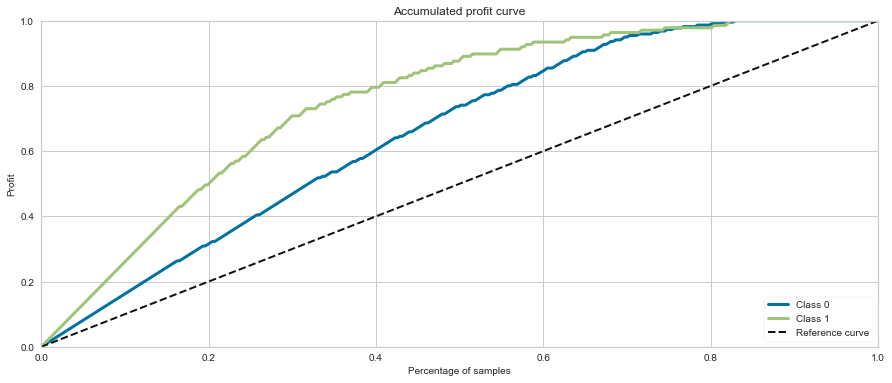

In [91]:
#Accumulated profit curve
fig, ax = plt.subplots(figsize=(15, 6))
y_probas = decision_tree_2_HPM.predict_proba(X_test_model_2)
skplt.metrics.plot_cumulative_gain(y_test_model_2,
                                   y_probas,
                                   ax=ax)
ax.set(title="Accumulated profit curve",
       xlabel="Percentage of samples",
       ylabel="Profit")
ax.legend(("Class 0",
           "Class 1",
           "Reference curve"),
          frameon=True,
          loc="lower right")
plt.show()

#### Lift curve

This curve describes how much better  is a given model than a reference model. <br>

If we rank passengers according to their probability of survival and choose the first 20%, increase will be equal
2,5 (this is the profit divided by the percentage of samples). So many times more passengers
will survive a catastrophe than with random selection. <br>
first 20% ----> 2,5 times more passengers will survive disasters than with random selection<br>
first 40% ----> 2,0 times more passengers will survive disasters than with random selection<br>
first 50% ----> 1,5 times more passengers will survive disasters than with random selection

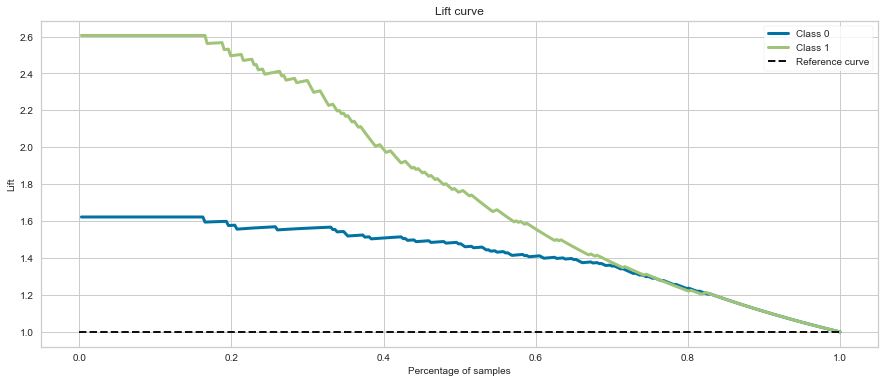

In [92]:
#Lift curve
fig, ax = plt.subplots(figsize=(15, 6))
y_probas = decision_tree_2_HPM.predict_proba(X_test_model_2)
skplt.metrics.plot_lift_curve(y_test_model_2, y_probas, ax=ax)
ax.set(title="Lift curve",
       xlabel="Percentage of samples",
       ylabel="Lift")
ax.legend(("Class 0",
           "Class 1",
           "Reference curve"),
          frameon=True,
          loc="upper right")
plt.show()

#### Forecasting error of classes

Class forecasting error - the upper part of the left bar represents the number of passengers who died, but were expected to survive (false positive), the lower part of the right-hand bar represents the number the surviving passengers, however, were expected to die (result falsely negative).

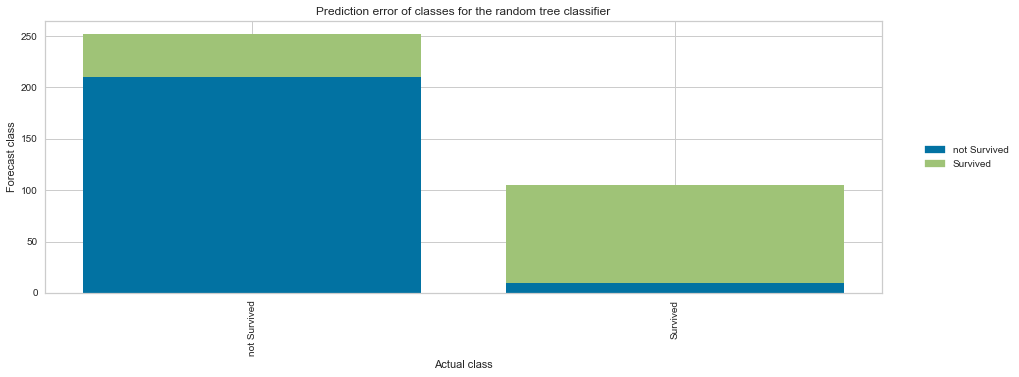

In [93]:
#Forecasting error of classes
fig, ax = plt.subplots(figsize=(15, 5))
cpe_viz = ClassPredictionError(decision_tree_2_HPM,
                               classes=["not Survived",
                                        "Survived"])
cpe_viz.score(X_test_model_2, y_test_model_2)
ax.set_xticks(np.arange(len(cpe_viz.classes)))
ax.set_xticklabels(cpe_viz.classes)
ax.set(title="Prediction error of classes for the random tree classifier",
       xlabel="Actual class",
       ylabel="Forecast class")
plt.show()

#### Comparison of test and training dataset results
The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [94]:
accuracy_model_2_HPM_training = accuracy_score(y_train_model_2, predictions_model_2_HPM_training)
recall_model_2_HPM_training = recall_score(y_train_model_2, predictions_model_2_HPM_training)
precision_model_2_HPM_training = precision_score(y_train_model_2, predictions_model_2_HPM_training)
f1_model_2_HPM_training = f1_score(y_train_model_2, predictions_model_2_HPM_training)

In [95]:
results_comparison_train_test_model_2_HPM = pd.DataFrame({"dataset" : ["Training dataset",
                                                                   "Test dataset"],
                                                      "Accuracy" : [accuracy_model_2_HPM_training,
                                                                    accuracy_model_2_HPM],
                                                     "Recall" : [recall_model_2_HPM_training,
                                                                 recall_model_2_HPM],
                                                     "Precision" : [precision_model_2_HPM_training,
                                                                    precision_model_2_HPM],
                                                     "F1" : [f1_model_2_HPM_training,
                                                             f1_model_2_HPM]}).set_index("dataset")
results_comparison_train_test_model_2_HPM.round(2)

,Accuracy,Recall,Precision,F1
dataset,,,,
Training dataset,0.86,0.67,0.95,0.79
Test dataset,0.85,0.69,0.90,0.79


<font size="3"> Results on training and test dataset do not differ significantly from each other. It means that there is no overfitting.

#### Feature importance in decision dree after tuning of hyperparameters

Among the variables included in the model gender, class and ticket price turned out to be the most important.

In [96]:
#DataFrame of futures importance
importances_decision_tree_2_HPM = pd.DataFrame({"Feature":X_train_model_2.columns,
                            "Importance":np.round(decision_tree_2_HPM.feature_importances_,3)})
importances_decision_tree_2_HPM = importances_decision_tree_2_HPM.sort_values("Importance",ascending=False).set_index("Feature")
importances_decision_tree_2_HPM.head(15)

,Importance
Feature,
Sex,0.433
Fare,0.363
Pclass,0.165
Embarked_S,0.040


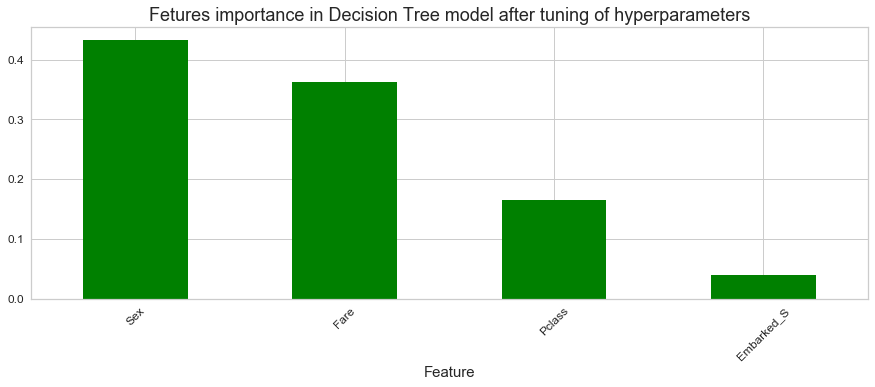

In [97]:
#Visualization of features importance
importances_decision_tree_2_HPM.plot.bar(color="green", figsize=(15,5))
plt.title("Fetures importance in Decision Tree model after tuning of hyperparameters", fontsize=18)
plt.xlabel("Feature",fontsize=15)
plt.ylabel("")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend("")

plt.show()

#### 6.3.9 Comparision of Decision Tree models before and after tuning of hyperparameters

The model after tuning of hyperparameters presents definitely better parameters results. 

In [98]:
#Indicators of model before tuning of hyperparameters
accuracy_model_2 = accuracy_score(y_test_model_2, predictions_model_2)
recall_model_2 = recall_score(y_test_model_2, predictions_model_2)
precision_model_2 = precision_score(y_test_model_2, predictions_model_2)
f1_model_2 = f1_score(y_test_model_2, predictions_model_2)
AUC_model_2 = roc_auc_score(y_test_model_2, predictions_model_2)

#Indicators of model after tuning of hyperparameters
accuracy_model_2_HPM = accuracy_score(y_test_model_2, predictions_model_2_HPM)
recall_model_2_HPM  = recall_score(y_test_model_2, predictions_model_2_HPM)
precision_model_2_HPM  = precision_score(y_test_model_2, predictions_model_2_HPM)
f1_model_2_HPM  = f1_score(y_test_model_2, predictions_model_2_HPM)
AUC_model_2_HPM  = roc_auc_score(y_test_model_2, predictions_model_2_HPM)

#Comparison of indicators of models before and after tuning of hyperparameters
modelComparison = pd.DataFrame({"Model": ["Decision tree",
                                          "Decision tree after tuning of hyperparameters"],
                                "Accuracy": [accuracy_model_2, accuracy_model_2_HPM],
                                "Recall" : [recall_model_2, recall_model_2_HPM],
                                "Precision" : [precision_model_2, precision_model_2_HPM],
                                "F1" : [f1_model_2, f1_model_2_HPM],
                                "AUC" : [AUC_model_2, AUC_model_2_HPM]}).set_index("Model")
modelComparison.round(2)

,Accuracy,Recall,Precision,F1,AUC
Model,,,,,
Decision tree,0.82,0.59,0.89,0.71,0.77
Decision tree after tuning of hyperparameters,0.85,0.69,0.90,0.79,0.82


#### 6.3.10 Prediction based on test dataset

In [99]:
#Prediction on the test dataset
prediction_model_2_HPM=decision_tree_2_HPM.predict_proba(X_test_model_2)[:,:]*100
prediction_model_2_HPM=pd.DataFrame(data=prediction_model_2_HPM, 
                         columns=["Probability of not Survived (0)","Probability of Survived (1)"])
prediction_model_2_HPM.head(5).round(2)

,Probability of not Survived (0),Probability of Survived (1)
0,0.00,100.00
1,68.25,31.75
2,61.29,38.71
3,87.05,12.95
4,84.44,15.56


In [100]:
#Join base table dataFirstModel with prediction table
DecisionTree_HPM_Prediction = data.join(prediction_model_2_HPM).round(2)
DecisionTree_HPM_Prediction.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Probability of not Survived (0),Probability of Survived (1)
0,0,3,0,22.0,1,0,7.25,0,1,0.00,100.00
1,1,1,1,38.0,1,0,71.28,0,0,68.25,31.75
2,1,3,1,26.0,0,0,7.92,0,1,61.29,38.71
3,1,1,1,35.0,1,0,53.10,0,1,87.05,12.95
4,0,3,0,35.0,0,0,8.05,0,1,84.44,15.56


#### 6.3.11 Export of model prediction to excel

In [101]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file
DecisionTree_HPM_Prediction.to_excel("Prediction of the Decision Tree model after tuning of hyperparameters.xlsx",
                                     index=False,
                                     header=True)

### 6.4 Random Forest - model 4

#### 6.4.1 Random Forest - model building

In [102]:
#X contains all features and y contains the target variable
X_model_3 = data.drop(labels=["Survived", "Parch", "Age", "SibSp", "Embarked_Q"], axis=1)
y_model_3 = data["Survived"]

In [103]:
#Division of data into training dataset (60%) and test dataset (40%)
X_train_model_3, X_test_model_3, y_train_model_3, y_test_model_3 = train_test_split(X_model_3,
                                                                                    y_model_3,
                                                                                    test_size = 0.4,
                                                                                    random_state = 2,
                                                                                    stratify=y_model_3)

In [104]:
#Creating classifier
random_forest = RandomForestClassifier(n_estimators=100)
#Training the model
random_forest.fit(X_train_model_3, y_train_model_3)

RandomForestClassifier()

In [105]:
#Prediction of test dataset
predictions_model_3 = random_forest.predict(X_test_model_3)

In [106]:
#Prediction of training dataset
predictions_model_3_training = random_forest.predict(X_train_model_3)

#### 6.4.2 Random Forest - model evaluation 

#### Confusion Matrix

The upper left and lower right quarters contain correct classification results, and the lower left and upper right are incorrect. The left lower quarter contains false negative results and the right upper quarter contains false positive results.

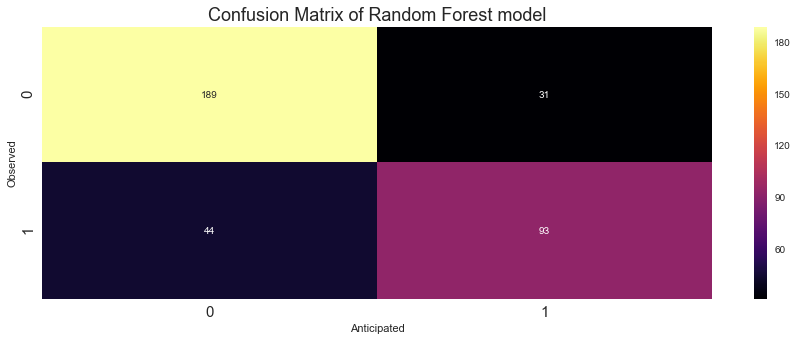

----------------------------------------
True Negative: 189
False Positive: 44
False Negative: 31
True Positive: 93
Correct Predictions 78.99 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.79 
 The Missclassification = 1-Accuracy =  0.21 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.75 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.81 
 Positive Predictive value = TP/(TP+FP) =  0.68 
 Negative predictive Value = TN/(TN+FN) =  0.86 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.97 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.31


In [107]:
#Confusion Matrix
plt.figure(figsize=(15,5))
confusion_matrix = pd.crosstab(y_test_model_3,
                               predictions_model_3,
                               rownames=["Observed"],
                               colnames=["Anticipated"])
sns.heatmap(confusion_matrix,
            annot=True,
            fmt = "d",
            cmap="inferno",
            xticklabels=["0","1"],
            yticklabels=["0","1"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Confusion Matrix of Random Forest model", fontsize= 18)
plt.show()

print("-"*40)

TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)
print("Correct Predictions", round((TN + TP) / len(predictions_model_3) * 100, 2), "%")

print("-"*40)

print("The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ",round((TP+TN)/float(TP+TN+FP+FN),2),"\n",  
"The Missclassification = 1-Accuracy = ",round(1-((TP+TN)/float(TP+TN+FP+FN)),2),"\n",   
"Sensitivity or True Positive Rate = TP/(TP+FN) = ",round(TP/float(TP+FN),2),"\n", 
"Specificity or True Negative Rate = TN/(TN+FP) = ",round(TN/float(TN+FP),2),"\n",
"Positive Predictive value = TP/(TP+FP) = ",round(TP/float(TP+FP),2),"\n",
"Negative predictive Value = TN/(TN+FN) = ",round(TN/float(TN+FN),2),"\n",
"Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ",round(sensitivity/(1-specificity),2),"\n",
"Negative likelihood Ratio = (1-Sensitivity)/Specificity = ", round((1-sensitivity)/specificity,2))

#### Classification Report and Indicators: Accuracy, Recall, Precision, F1

**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [108]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_3, predictions_model_3))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       220
           1       0.75      0.68      0.71       137

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.79      0.79      0.79       357



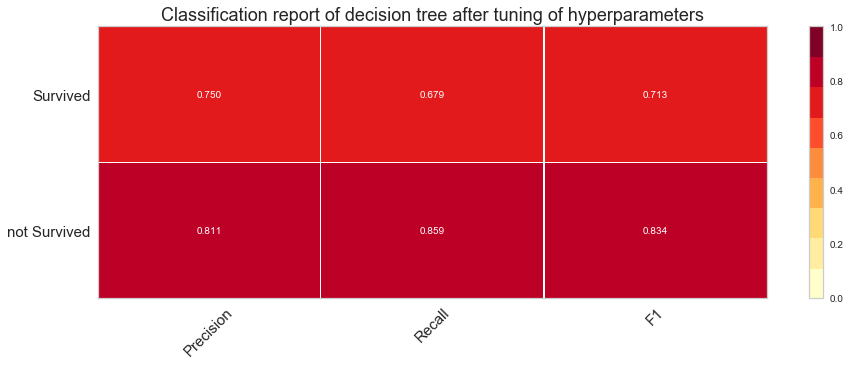

Indicators:

Accuracy: 0.79
--------------------
Recall: 0.68
--------------------
Precision: 0.75
--------------------
F1: 0.71


In [109]:
#Classification report and indicators: accuracy, recall, precision, f1
fig, ax = plt.subplots(figsize=(15, 5))
cm_viz = ClassificationReport(random_forest,
                              classes=["not Survived", "Survived"])
cm_viz.score(round(X_test_model_3,2), y_test_model_3)
cm_viz.ax.set_title("Classification report of decision tree after tuning of hyperparameters", fontsize=18)
xlabels = ("Precision", "Recall", "F1")
ax.set_xticks(np.arange(len(xlabels)) + 0.5)
ax.set_xticklabels(xlabels, rotation=45, fontsize=15)
ax.set_yticks(np.arange(len(cm_viz.classes)) + 0.5)
ax.set_yticklabels(cm_viz.classes, fontsize=15)

plt.show()

print("Indicators:")
print("")
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_model_3 = round(accuracy_score(y_test_model_3, predictions_model_3),2)
print("Accuracy: %0.2f" % (accuracy_model_3))
print("-"*20)
#Recall
from sklearn.metrics import recall_score
recall_model_3 = round(recall_score(y_test_model_3, predictions_model_3),2)
print("Recall: %0.2f" % (recall_model_3))
print("-"*20)
#Precision
from sklearn.metrics import precision_score
precision_model_3 = round(precision_score(y_test_model_3, predictions_model_3),2)
print("Precision: %0.2f" % (precision_model_3))
print("-"*20)
#F1
from sklearn.metrics import f1_score
f1_model_3 = round(f1_score(y_test_model_3, predictions_model_3),2)
print("F1: %0.2f" % (f1_model_3))

#### AUC (Area under curve)

Area under the ROC curve is 0.83, which is a very good result and illustrates high efficiency of the model.

In [110]:
#Calculation of area under the ROC curve
y_pred_proba_model_3 = random_forest.predict_proba(X_test_model_3)[::,1]
AUC_model_3 = round(roc_auc_score(y_test_model_3, y_pred_proba_model_3),2)
print("AUC (Area under the curve) is:", AUC_model_3)

AUC (Area under the curve) is: 0.83


#### Comparison of test and training dataset results
The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [111]:
accuracy_model_3_training = accuracy_score(y_train_model_3, predictions_model_3_training)
recall_model_3_training = recall_score(y_train_model_3, predictions_model_3_training)
precision_model_3_training = precision_score(y_train_model_3, predictions_model_3_training)
f1_model_3_training = f1_score(y_train_model_3, predictions_model_3_training)

In [112]:
results_comparison_train_test_model_3 = pd.DataFrame({"dataset" : ["Training dataset",
                                                                   "Test dataset"],
                                                      "Accuracy" : [accuracy_model_3_training,
                                                                    accuracy_model_3],
                                                     "Recall" : [recall_model_3_training,
                                                                 recall_model_3],
                                                     "Precision" : [precision_model_3_training,
                                                                    precision_model_3],
                                                     "F1" : [f1_model_3_training,
                                                             f1_model_3]}).set_index("dataset")
results_comparison_train_test_model_3.round(2)

,Accuracy,Recall,Precision,F1
dataset,,,,
Training dataset,0.92,0.84,0.94,0.89
Test dataset,0.79,0.68,0.75,0.71


<font size="3"> Results on training and test dataset are differ significantly from each other. It means that there could be overfitting.

#### Feature importance in random forest

Among the variables included in the model gender and ticket price turned out to be the most important.

In [113]:
#DataFrame of futures importance
importances_random_forest = pd.DataFrame({"Feature":X_train_model_3.columns,
                            "Importance":np.round(random_forest.feature_importances_,3)})
importances_random_forest = importances_random_forest.sort_values("Importance",ascending=False).set_index("Feature")
importances_random_forest.head(15)

,Importance
Feature,
Fare,0.543
Sex,0.331
Pclass,0.099
Embarked_S,0.027


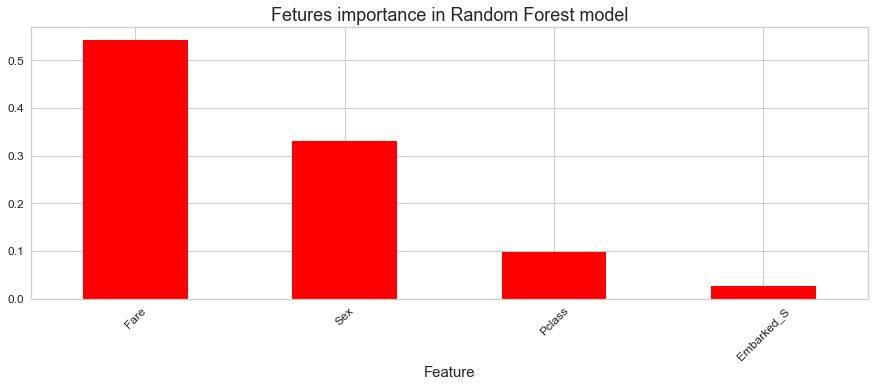

In [114]:
#Visualization of features importance
importances_random_forest.plot.bar(color="red", figsize=(15,5))
plt.title("Fetures importance in Random Forest model", fontsize=18)
plt.xlabel("Feature",fontsize=15)
plt.ylabel("")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend("")

plt.show()

#### 6.4.3 Prediction based on test dataset

In [115]:
#Prediction on the test dataset
prediction_model_3=random_forest.predict_proba(X_test_model_3)[:,:]*100
prediction_model_3=pd.DataFrame(data=prediction_model_3, 
                         columns=["Probability of not Survived (0)","Probability of Survived (1)"])
prediction_model_3.head(5).round(2)

,Probability of not Survived (0),Probability of Survived (1)
0,100.00,0.00
1,33.67,66.33
2,0.00,100.00
3,78.10,21.90
4,100.00,0.00


In [116]:
#Join base table dataFirstModel with prediction table
RandomForest_Prediction = data.join(prediction_model_3).round(2)
RandomForest_Prediction.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Probability of not Survived (0),Probability of Survived (1)
0,0,3,0,22.0,1,0,7.25,0,1,100.00,0.00
1,1,1,1,38.0,1,0,71.28,0,0,33.67,66.33
2,1,3,1,26.0,0,0,7.92,0,1,0.00,100.00
3,1,1,1,35.0,1,0,53.10,0,1,78.10,21.90
4,0,3,0,35.0,0,0,8.05,0,1,100.00,0.00


#### 6.4.4 Export of model prediction to excel

In [117]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file 
RandomForest_Prediction.to_excel("Prediction of the Random Forest model.xlsx",
                                     index=False,
                                     header=True)

#### 6.4.5 Random Forest - tuning of hyperparameters - model 5

In [118]:
#Dictionary of parameters designed for testing combinations giving the highest performance
grid_parameters_random_forest_HPM = {"criterion" : ["gini", "entropy"],
                                 "min_samples_leaf" : [1, 5, 10],
                                 "min_samples_split" : [2, 4, 6],
                                 "n_estimators": [200, 500],
                                 "max_depth" : range(4,7,1)}

In [119]:
#Looking for the best combination of parameters
grid_search_2 = GridSearchCV(estimator=random_forest,
                             param_grid=grid_parameters_random_forest_HPM,
                             cv=5)

In [120]:
grid_search_2.fit(X_train_model_3, y_train_model_3)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 7),
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 500]})

In [121]:
#Best values of hiperparameters
best_parameters_2 = grid_search_2.best_params_
print(best_parameters_2)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [123]:
#Creating classifier with best parameters
random_forest_2_HPM = RandomForestClassifier(criterion="gini",
                                             max_depth=5,
                                             min_samples_leaf= 5,
                                             min_samples_split= 2,
                                             n_estimators = 200)
random_forest_2_HPM.fit(X = X_model_3, y = y_model_3)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200)

In [124]:
#Prediction of test dataset
predictions_model_3_HPM = random_forest_2_HPM.predict(X_test_model_3)

In [125]:
#Prediction of test dataset
predictions_model_3_HPM_training = random_forest_2_HPM.predict(X_train_model_3)

#### 6.4.6 Random Forest - model evaluation after tuning of hyperparameters

#### Confusion Matrix

The upper left and lower right quarters contain correct classification results, and the lower left and upper right are incorrect. The left lower quarter contains false negative results and the right upper quarter contains false positive results.

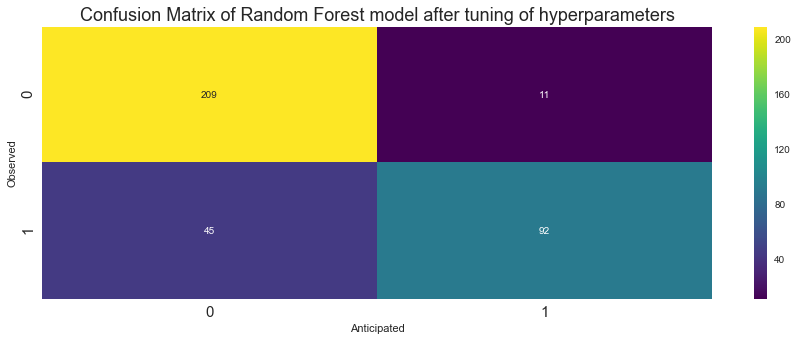

----------------------------------------
True Negative: 209
False Positive: 45
False Negative: 11
True Positive: 92
Correct Predictions 84.31 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.84 
 The Missclassification = 1-Accuracy =  0.16 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.89 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.82 
 Positive Predictive value = TP/(TP+FP) =  0.67 
 Negative predictive Value = TN/(TN+FN) =  0.95 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  5.04 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.13


In [126]:
#Confusion Matrix
plt.figure(figsize=(15,5))
confusion_matrix = pd.crosstab(y_test_model_3,
                               predictions_model_3_HPM,
                               rownames=["Observed"],
                               colnames=["Anticipated"])
sns.heatmap(confusion_matrix,
            annot=True,
            fmt = "d",
            cmap="viridis",
            xticklabels=["0","1"],
            yticklabels=["0","1"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Confusion Matrix of Random Forest model after tuning of hyperparameters", fontsize= 18)
plt.show()

print("-"*40)

TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)
print("Correct Predictions", round((TN + TP) / len(predictions_model_3_HPM) * 100, 2), "%")

print("-"*40)

print("The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ",round((TP+TN)/float(TP+TN+FP+FN),2),"\n",  
"The Missclassification = 1-Accuracy = ",round(1-((TP+TN)/float(TP+TN+FP+FN)),2),"\n",   
"Sensitivity or True Positive Rate = TP/(TP+FN) = ",round(TP/float(TP+FN),2),"\n", 
"Specificity or True Negative Rate = TN/(TN+FP) = ",round(TN/float(TN+FP),2),"\n",
"Positive Predictive value = TP/(TP+FP) = ",round(TP/float(TP+FP),2),"\n",
"Negative predictive Value = TN/(TN+FN) = ",round(TN/float(TN+FN),2),"\n",
"Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ",round(sensitivity/(1-specificity),2),"\n",
"Negative likelihood Ratio = (1-Sensitivity)/Specificity = ", round((1-sensitivity)/specificity,2))

#### Classification Report and Indicators: Accuracy, Recall, Precision, F1

**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [127]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_3, predictions_model_3_HPM))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       220
           1       0.89      0.67      0.77       137

    accuracy                           0.84       357
   macro avg       0.86      0.81      0.82       357
weighted avg       0.85      0.84      0.84       357



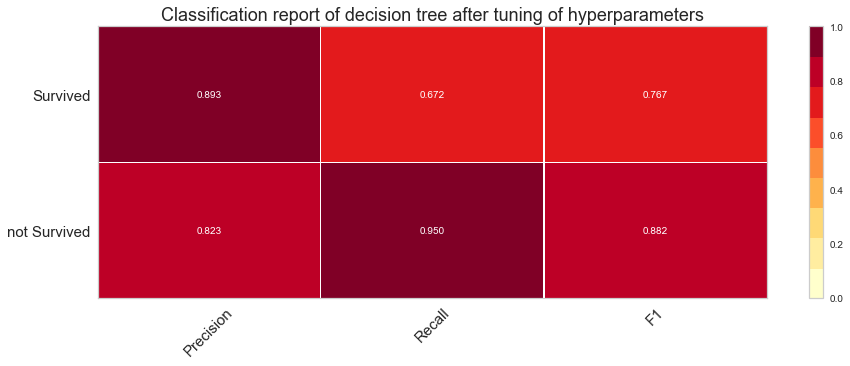

Indicators:

Accuracy: 0.84
--------------------
Recall: 0.67
--------------------
Precision: 0.89
--------------------
F1: 0.77


In [128]:
#Classification report and indicators: accuracy, recall, precision, f1
fig, ax = plt.subplots(figsize=(15, 5))
cm_viz = ClassificationReport(random_forest_2_HPM,
                              classes=["not Survived", "Survived"])
cm_viz.score(round(X_test_model_3,2), y_test_model_3)
cm_viz.ax.set_title("Classification report of decision tree after tuning of hyperparameters", fontsize=18)
xlabels = ("Precision", "Recall", "F1")
ax.set_xticks(np.arange(len(xlabels)) + 0.5)
ax.set_xticklabels(xlabels, rotation=45, fontsize=15)
ax.set_yticks(np.arange(len(cm_viz.classes)) + 0.5)
ax.set_yticklabels(cm_viz.classes, fontsize=15)

plt.show()

print("Indicators:")
print("")
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_model_3_HPM = round(accuracy_score(y_test_model_3, predictions_model_3_HPM),2)
print("Accuracy: %0.2f" % (accuracy_model_3_HPM))
print("-"*20)
#Recall
from sklearn.metrics import recall_score
recall_model_3_HPM  = round(recall_score(y_test_model_3, predictions_model_3_HPM),2)
print("Recall: %0.2f" % (recall_model_3_HPM))
print("-"*20)
#Precision
from sklearn.metrics import precision_score
precision_model_3_HPM  = round(precision_score(y_test_model_3, predictions_model_3_HPM),2)
print("Precision: %0.2f" % (precision_model_3_HPM))
print("-"*20)
#F1
from sklearn.metrics import f1_score
f1_model_3_HPM  = round(f1_score(y_test_model_3, predictions_model_3_HPM),2)
print("F1: %0.2f" % (f1_model_3_HPM))

#### AUC (Area under curve)

Area under the ROC curve is 0.89, which is a very good result and illustrates high efficiency of the model.

In [129]:
#Calculation of area under the ROC curve
y_pred_proba_model_3_HPM = random_forest_2_HPM.predict_proba(X_test_model_3)[::,1]
AUC_model_3_HPM = round(roc_auc_score(y_test_model_3, y_pred_proba_model_3_HPM),2)
print("AUC (Area under the curve) is:", AUC_model_3_HPM)

AUC (Area under the curve) is: 0.89


#### Comparison of test and training dataset results
The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [130]:
accuracy_model_3_HPM_training = accuracy_score(y_train_model_3, predictions_model_3_HPM_training)
recall_model_3_HPM_training = recall_score(y_train_model_3, predictions_model_3_HPM_training)
precision_model_3_HPM_training = precision_score(y_train_model_3, predictions_model_3_HPM_training)
f1_model_3_HPM_training = f1_score(y_train_model_3, predictions_model_3_HPM_training)

In [131]:
results_comparison_train_test_model_3_HPM = pd.DataFrame({"dataset" : ["Training dataset",
                                                                   "Test dataset"],
                                                      "Accuracy" : [accuracy_model_3_HPM_training,
                                                                    accuracy_model_3_HPM],
                                                     "Recall" : [recall_model_3_HPM_training,
                                                                 recall_model_3_HPM],
                                                     "Precision" : [precision_model_3_HPM_training,
                                                                    precision_model_3_HPM],
                                                     "F1" : [f1_model_3_HPM_training,
                                                             f1_model_3_HPM]}).set_index("dataset")
results_comparison_train_test_model_3_HPM.round(2)

,Accuracy,Recall,Precision,F1
dataset,,,,
Training dataset,0.82,0.61,0.89,0.73
Test dataset,0.84,0.67,0.89,0.77


Results on training and test dataset do not differ significantly from each other. It means that there is no overfitting.

#### Feature importance in random forest after tuning of hyperparameters

Among the variables included in the model ticket price and gender turned out to be the most important.

In [132]:
#DataFrame of futures importance
importances_random_forest_2_HPM = pd.DataFrame({"Feature":X_train_model_3.columns,
                            "Importance":np.round(random_forest_2_HPM.feature_importances_,3)})
importances_random_forest_2_HPM = importances_random_forest_2_HPM.sort_values("Importance",ascending=False).set_index("Feature")
importances_random_forest_2_HPM.head(15)

,Importance
Feature,
Sex,0.555
Fare,0.250
Pclass,0.169
Embarked_S,0.026


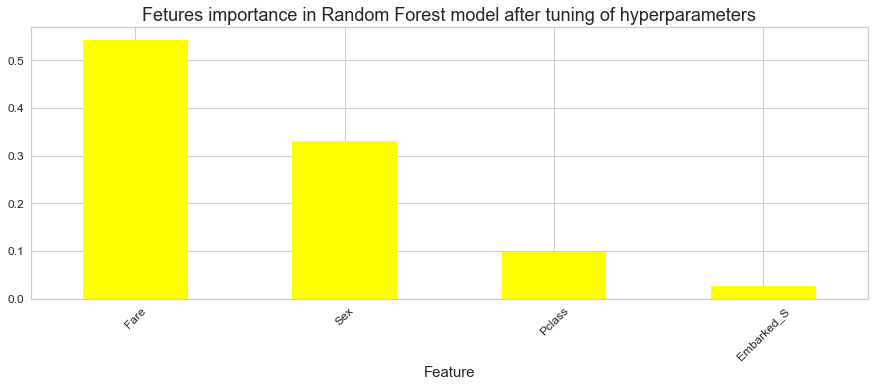

In [133]:
#Visualization of features importance
importances_random_forest.plot.bar(color="yellow", figsize=(15,5))
plt.title("Fetures importance in Random Forest model after tuning of hyperparameters", fontsize=18)
plt.xlabel("Feature",fontsize=15)
plt.ylabel("")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend("")

plt.show()

#### 6.4.7 Comparision of Random Forest models before and after tuning of hyperparameters

The model after tuning of hyperparameters presents definitely better parameters results. The exception is Recall, which has worsened.

In [134]:
accuracy_model_3 = accuracy_score(y_test_model_3, predictions_model_3)
recall_model_3 = recall_score(y_test_model_3, predictions_model_3)
precision_model_3 = precision_score(y_test_model_3, predictions_model_3)
f1_model_3 = f1_score(y_test_model_3, predictions_model_3)
AUC_model_3 = roc_auc_score(y_test_model_3, predictions_model_3)

accuracy_model_3_HPM = accuracy_score(y_test_model_3, predictions_model_3_HPM)
recall_model_3_HPM  = recall_score(y_test_model_3, predictions_model_3_HPM)
precision_model_3_HPM  = precision_score(y_test_model_3, predictions_model_3_HPM)
f1_model_3_HPM  = f1_score(y_test_model_3, predictions_model_3_HPM)
AUC_model_3_HPM  = roc_auc_score(y_test_model_3, predictions_model_3_HPM)

modelComparison_2 = pd.DataFrame({"Model": ["Random Forest",
                                          "Random Forest after tuning of hyperparameters"],
                                "Accuracy": [accuracy_model_3, accuracy_model_3_HPM],
                                "Recall" : [recall_model_3, recall_model_3_HPM],
                                "Precision" : [precision_model_3, precision_model_3_HPM],
                                "F1" : [f1_model_3, f1_model_3_HPM],
                                "AUC" : [AUC_model_3, AUC_model_3_HPM]}).set_index("Model")
modelComparison_2.round(2)

,Accuracy,Recall,Precision,F1,AUC
Model,,,,,
Random Forest,0.79,0.68,0.75,0.71,0.77
Random Forest after tuning of hyperparameters,0.84,0.67,0.89,0.77,0.81


#### 6.4.8 Prediction based on test dataset

In [135]:
#Prediction on the test dataset
prediction_model_3_HPM=random_forest_2_HPM.predict_proba(X_test_model_3)[:,:]*100
prediction_model_3_HPM=pd.DataFrame(data=prediction_model_3_HPM, 
                         columns=["Probability of not Survived (0)","Probability of Survived (1)"])
prediction_model_3_HPM.head(5).round(2)

,Probability of not Survived (0),Probability of Survived (1)
0,91.60,8.40
1,60.42,39.58
2,2.76,97.24
3,86.08,13.92
4,91.97,8.03


In [136]:
#Join base table dataFirstModel with prediction table
RandomForest_HPM_Prediction = data.join(prediction_model_3_HPM).round(2)
RandomForest_HPM_Prediction.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Probability of not Survived (0),Probability of Survived (1)
0,0,3,0,22.0,1,0,7.25,0,1,91.60,8.40
1,1,1,1,38.0,1,0,71.28,0,0,60.42,39.58
2,1,3,1,26.0,0,0,7.92,0,1,2.76,97.24
3,1,1,1,35.0,1,0,53.10,0,1,86.08,13.92
4,0,3,0,35.0,0,0,8.05,0,1,91.97,8.03


#### 6.4.9 Export of model prediction to excel

In [137]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file 
RandomForest_HPM_Prediction.to_excel("Prediction of the Random Forest model after tuning of hyperparameters.xlsx",
                                index=False,
                                header=True)

### 6.5 K Nearest Neighbor (KNN) - model 6

#### 6.5.1 KNN - model building

In [138]:
#X contains all features and y contains the target variable
X_model_4 = data.drop(labels=["Survived", "Parch", "Age", "SibSp", "Embarked_Q"], axis=1)
y_model_4 = data["Survived"]

In [139]:
#Division of data into training dataset (60%) and test dataset (40%)
X_train_model_4, X_test_model_4, y_train_model_4, y_test_model_4 = train_test_split(X_model_4,
                                                                                    y_model_4,
                                                                                    test_size = 0.4,
                                                                                    random_state = 3,
                                                                                    stratify=y_model_4)

In [140]:
#Creating classifier
KNN = KNeighborsClassifier(n_neighbors = 3)
#Training the model
KNN.fit(X_train_model_4, y_train_model_4)

KNeighborsClassifier(n_neighbors=3)

In [141]:
#Prediction of test dataset
predictions_model_4 = KNN.predict(X_test_model_4)

In [142]:
#Prediction of training dataset
predictions_model_4_training = KNN.predict(X_train_model_4)

#### 6.5.2 KNN - model evaluation

#### Confusion Matrix

The upper left and lower right quarters contain correct classification results, and the lower left and upper right are incorrect. The left lower quarter contains false negative results and the right upper quarter contains false positive results.

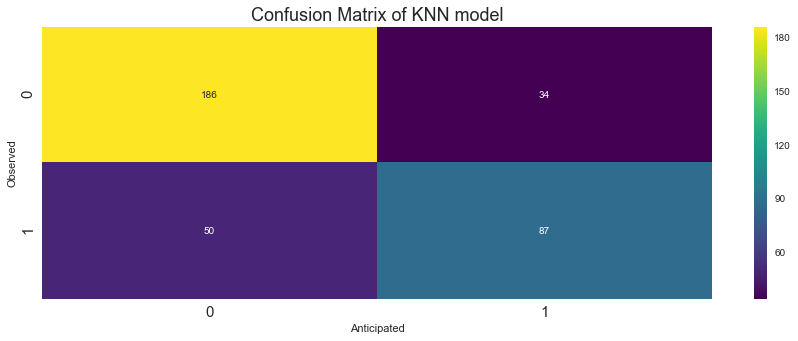

----------------------------------------
True Negative: 186
False Positive: 50
False Negative: 34
True Positive: 87
Correct Predictions 76.47 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.76 
 The Missclassification = 1-Accuracy =  0.24 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.72 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.79 
 Positive Predictive value = TP/(TP+FP) =  0.64 
 Negative predictive Value = TN/(TN+FN) =  0.85 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.39 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.36


In [143]:
#Confusion Matrix
plt.figure(figsize=(15,5))
confusion_matrix = pd.crosstab(y_test_model_4,
                               predictions_model_4,
                               rownames=["Observed"],
                               colnames=["Anticipated"])
sns.heatmap(confusion_matrix,
            annot=True,
            fmt = "d",
            cmap="viridis",
            xticklabels=["0","1"],
            yticklabels=["0","1"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Confusion Matrix of KNN model", fontsize= 18)
plt.show()

print("-"*40)

TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)
print("Correct Predictions", round((TN + TP) / len(predictions_model_4) * 100, 2), "%")

print("-"*40)

print("The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ",round((TP+TN)/float(TP+TN+FP+FN),2),"\n",  
"The Missclassification = 1-Accuracy = ",round(1-((TP+TN)/float(TP+TN+FP+FN)),2),"\n",   
"Sensitivity or True Positive Rate = TP/(TP+FN) = ",round(TP/float(TP+FN),2),"\n", 
"Specificity or True Negative Rate = TN/(TN+FP) = ",round(TN/float(TN+FP),2),"\n",
"Positive Predictive value = TP/(TP+FP) = ",round(TP/float(TP+FP),2),"\n",
"Negative predictive Value = TN/(TN+FN) = ",round(TN/float(TN+FN),2),"\n",
"Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ",round(sensitivity/(1-specificity),2),"\n",
"Negative likelihood Ratio = (1-Sensitivity)/Specificity = ", round((1-sensitivity)/specificity,2))

#### Classification Report and Indicators: Accuracy, Recall, Precision, F1

**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [144]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_4, predictions_model_4))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       220
           1       0.72      0.64      0.67       137

    accuracy                           0.76       357
   macro avg       0.75      0.74      0.75       357
weighted avg       0.76      0.76      0.76       357



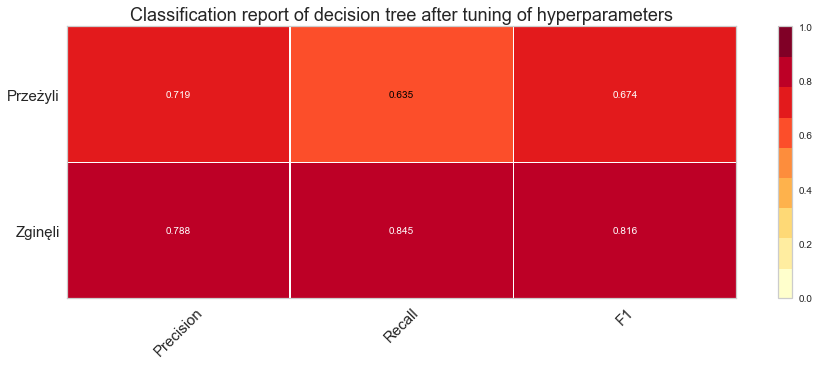

Indicators:

Accuracy: 0.76
--------------------
Recall: 0.64
--------------------
Precision: 0.72
--------------------
F1: 0.67


In [145]:
#Classification report and indicators: accuracy, recall, precision, f1
fig, ax = plt.subplots(figsize=(15, 5))
cm_viz = ClassificationReport(KNN,
                              classes=["Zginęli", "Przeżyli"])
cm_viz.score(round(X_test_model_4,2), y_test_model_4)
cm_viz.ax.set_title("Classification report of decision tree after tuning of hyperparameters", fontsize=18)
xlabels = ("Precision", "Recall", "F1")
ax.set_xticks(np.arange(len(xlabels)) + 0.5)
ax.set_xticklabels(xlabels, rotation=45, fontsize=15)
ax.set_yticks(np.arange(len(cm_viz.classes)) + 0.5)
ax.set_yticklabels(cm_viz.classes, fontsize=15)

plt.show()

print("Indicators:")
print("")
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_model_4 = round(accuracy_score(y_test_model_4, predictions_model_4),2)
print("Accuracy: %0.2f" % (accuracy_model_4))
print("-"*20)
#Recall
from sklearn.metrics import recall_score
recall_model_4  = round(recall_score(y_test_model_4, predictions_model_4),2)
print("Recall: %0.2f" % (recall_model_4))
print("-"*20)
#Precision
from sklearn.metrics import precision_score
precision_model_4  = round(precision_score(y_test_model_4, predictions_model_4),2)
print("Precision: %0.2f" % (precision_model_4))
print("-"*20)
#F1
from sklearn.metrics import f1_score
f1_model_4  = round(f1_score(y_test_model_4, predictions_model_4),2)
print("F1: %0.2f" % (f1_model_4))

#### AUC (Area under curve)

Area under the ROC curve is 0.81, which is a very good result and illustrates high efficiency of the model.

In [146]:
#Calculation of area under the ROC curve
y_pred_proba_model_4 = KNN.predict_proba(X_test_model_4)[::,1]
AUC_model_4 = round(roc_auc_score(y_test_model_4, y_pred_proba_model_4),2)
print("AUC (Area under the curve) is:", AUC_model_4)

AUC (Area under the curve) is: 0.81


#### Comparison of test and training dataset results
The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [147]:
accuracy_model_4_training = accuracy_score(y_train_model_4, predictions_model_4_training)
recall_model_4_training = recall_score(y_train_model_4, predictions_model_4_training)
precision_model_4_training = precision_score(y_train_model_4, predictions_model_4_training)
f1_model_4_training = f1_score(y_train_model_4, predictions_model_4_training)

In [148]:
results_comparison_train_test_model_4 = pd.DataFrame({"dataset" : ["Training dataset",
                                                                   "Test dataset"],
                                                      "Accuracy" : [accuracy_model_4_training,
                                                                    accuracy_model_4],
                                                     "Recall" : [recall_model_4_training,
                                                                 recall_model_4],
                                                     "Precision" : [precision_model_4_training,
                                                                    precision_model_4],
                                                     "F1" : [f1_model_4_training,
                                                             f1_model_4]}).set_index("dataset")
results_comparison_train_test_model_4.round(2)

,Accuracy,Recall,Precision,F1
dataset,,,,
Training dataset,0.84,0.74,0.82,0.78
Test dataset,0.76,0.64,0.72,0.67


Results on training and test dataset do not differ significantly from each other. It means that there is no overfitting.

#### 6.5.3 Prediction based on test dataset

In [149]:
#Prediction on the test dataset
prediction_model_4=KNN.predict_proba(X_test_model_4)[:,:]*100
prediction_model_4=pd.DataFrame(data=prediction_model_4, 
                         columns=["Probability of not Survived (0)","Probability of Survived (1)"])
prediction_model_4.head(5).round(2)

,Probability of not Survived (0),Probability of Survived (1)
0,100.00,0.00
1,66.67,33.33
2,100.00,0.00
3,66.67,33.33
4,66.67,33.33


In [150]:
#Join base table dataFirstModel with prediction table
KNN_Prediction = data.join(prediction_model_4).round(2)
KNN_Prediction.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Probability of not Survived (0),Probability of Survived (1)
0,0,3,0,22.0,1,0,7.25,0,1,100.00,0.00
1,1,1,1,38.0,1,0,71.28,0,0,66.67,33.33
2,1,3,1,26.0,0,0,7.92,0,1,100.00,0.00
3,1,1,1,35.0,1,0,53.10,0,1,66.67,33.33
4,0,3,0,35.0,0,0,8.05,0,1,66.67,33.33


#### 6.5.4 Export of model prediction to excel

In [151]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file 
KNN_Prediction.to_excel("Prediction of the KNN model.xlsx",
                                index=False,
                                header=True)

## 7. Comparison of constructed models

Decision tree after hyperparameter tuning presents definitely the best results. Random forest after hyperparameter tuning also presents high results which confirms that it is appropriate idea to tuning hyperparameters to get better results in model. The worst results were achieved by the KNN model.<br>
The best model (Decision Tree after tuning of hyperparameters) has:
* percent of correct forecast = 0.85 
* percent of positively classified positive results = 0.69
* percent of correct positive forecasts = 0.90
* harmonic average of precision and sensitivity = 0.79
* area under the roc curve = 0.82

In [152]:
#Comparison of indicators of all models
all_models_comparison = pd.DataFrame({"Model": ["Logistic Regression",
                                             "Decision Tree",
                                             "Decision Tree after tuning hyperparameters",
                                             "Random Forest",
                                             "Random Forest after tuning of hyperparameters",
                                             "KNN"],
                                "Accuracy": [accuracy_model_1,
                                             accuracy_model_2,
                                             accuracy_model_2_HPM,
                                             accuracy_model_3,
                                             accuracy_model_3_HPM,
                                             accuracy_model_4],
                                "Recall" : [recall_model_1,
                                            recall_model_2,
                                            recall_model_2_HPM,
                                            recall_model_3,
                                            recall_model_3_HPM,
                                            recall_model_4],
                                "Precision" : [precision_model_1,
                                               precision_model_2,
                                               precision_model_2_HPM,
                                               precision_model_3,
                                               precision_model_3_HPM,
                                               precision_model_4],
                                "F1" : [f1_model_1,
                                        f1_model_2,
                                        f1_model_2_HPM,
                                        f1_model_3,
                                        f1_model_3_HPM,
                                        f1_model_4],
                                "AUC" : [AUC_model_1,
                                         AUC_model_2,
                                         AUC_model_2_HPM,
                                         AUC_model_3,
                                         AUC_model_3_HPM,
                                         AUC_model_4]}).set_index("Model")
all_models_comparison.round(2)

,Accuracy,Recall,Precision,F1,AUC
Model,,,,,
Logistic Regression,0.77,0.69,0.71,0.70,0.83
Decision Tree,0.82,0.59,0.89,0.71,0.77
Decision Tree after tuning hyperparameters,0.85,0.69,0.90,0.79,0.82
Random Forest,0.79,0.68,0.75,0.71,0.77
Random Forest after tuning of hyperparameters,0.84,0.67,0.89,0.77,0.81
KNN,0.76,0.64,0.72,0.67,0.81


## 8. Conclusions

**General summary** <br>
* The main problem of this project was to build and select the best model that anticipates probability of death or survival of the Titanic passenger based on available passengers information using Logistic Regression, Decision Tree, Random Forest and KNN.<br>
* To predict the target variable 6 models have been built in this: Logistic Regression, Decision Tree, Random Forest and KNN. Moreover, in the decision tree and random forest, hyperparameters were tuned and 2 new models to compare were built.

**EDA (Exploratory Data Analysis) summary** <br>
* Base dataset contained 12 variables including target variable (Survived). Furthermore, the dataset had 891 observations. <br>
* The dataset contained missing variables in 3 columns: Age, Cabin, Embarked which have been supplemented or removed accordingly.<br>
* Data was cleaned and then gouped and visualized using countplot, boxplot, heatmap and histogram. 

**Modelling summary**<br>
* In order to build the best models and avoid overfitting Pearson correlation coefficient was used to select data. Moreover, GridSearchCV method was used to tuning hyperparameters in Decision Tree and Random Forest. <br>
* In each model Test dataset was choosed to be 40% of initial dataset.<br>
* All models present really good results. Nevertheless, in Random Forest without tuning of hyperparameters, results on training and test dataset are differ significantly from each other. It means that there could be overfitting. <br>
* Models were evluated based on: Accuracy, Recall, Precision, F1, ROC curve and AUC. Furthermore, Decision Tree after tuning of hyperparameters was additianlly evaluated by several charts: Precision-recall curve, Accumulated profit curve, Lift curve, Forecasting error of classes, ROC curve. <br>
* Decision Tree after tuning of hyperparameters presents definitely the best parameters. 